# 프로그래밍3


## 3조 - 고위공직자 재산목록 분석

* 201804235 이현중
* 201804217 유제우
* 202004191 김소현

---

* 데이터셋 설명
-> 뉴스타파에서 공개한 2022 정부 및 국회 공직자 재산현황 데이터
-> 고위공직자의 소속, 직위, 성명, 대분류, 재산의 종류, 소재지, 재산 변화량, 변동사유 등의 정보가 담겨있습니다.

* 주제 및 목적
-> 대선 이후, 공직자 윤리법 제 10조에 의거하여 정부 및 국회의 고위공직자 윤리위원회의 재산 데이터가 기존의 pdf가 아닌 csv 형태로 배포되었습니다. 당시의 정치적 상황으로 인해 흥미가 가는 데이터였기에 해당 데이터로 선정하게 되었습니다.
-> 따라서 해당 데이터를 이용하여 3월 기준 정부인사 및 기존 국회의원들의 재산 증식현상에 대해 분석할 것입니다.
-> 코로나 사태 이후로 많은 자영업자 및 국민들이 재정적인 어려움을 겪었습니다. 하지만 이런 상황에서도 올해 3월 31일에 공개된 고위공직자 재산 변동 내용을 보면 고위공직자들의 1인당 평균 재산은 작년에 비해서 3억원가량 불어났다고 합니다.
-> 어떤 직책이 가장 재산이 많은지, 같은 인물의 토지, 건물, 예금 등 재산의 실제 거래 가격을 더하여 재산 비율에 대하여 알아볼 계획입니다. 그리고, 어떤 직책의 임기 중 재산 증액이 가장 많을지 알아보기 위하여 증가액 및 증가액 실제 거래 가격을 기준으로 분석해볼 것이며, 현재 이슈가 되고 있는 부동산 폭등 현상에 대해서 총체적으로 탐구해보고자 합니다.
-> 서울지역의 땅 및 부동산 시세가 많이 상승했습니다. 따라서 서울에 토지, 부동산이 많은 사람은 시세차익을 많이 보았을 것으로 예상됩니다. 또한, 개별 인덱스의 같은 이름 대비 토지와 건물 및 예금의 개수를 세어보면 임기 중 재산 증식 정도에 대하여 볼 수 있을 것으로 생각됩니다.




->실제 기사를 통해 확인을 해보니, 아래와 같은 내용을 확인할 수 있었습니다.


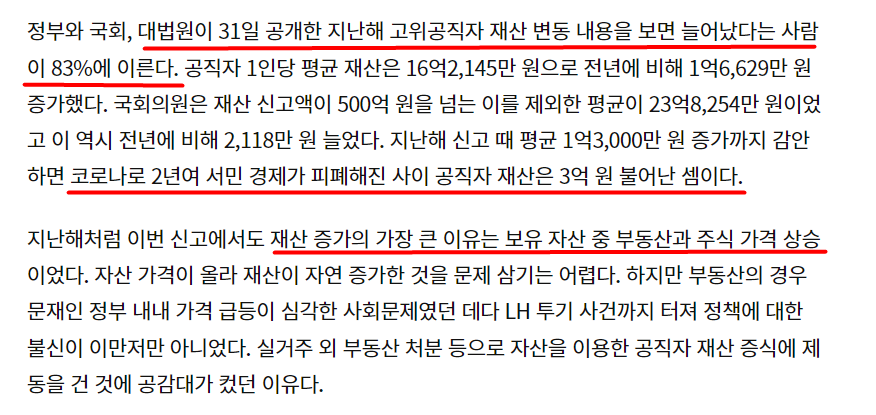

<출처: https://m.hankookilbo.com/News/Read/A2022033112020003391>

----

# 1. 라이브러리 불러오기 및 데이터 합치기

In [1]:
import pandas as pd
import numpy as np
import glob
import os

In [3]:
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline


# 사용자 운영체제 확인
import platform
platform.system()

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정"
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [3]:
# 국회재산 + 고위공직자 재산 csv파일 합치기

input_file = r'data' # csv파일들이 있는 디렉토리 위치
output_file = r'data\asset_All.csv' # 병합하고 저장하려는 파일명

allFile_list = glob.glob(os.path.join(input_file, 'asset_*')) # glob함수로 sales_로 시작하는 파일들을 모은다
print(allFile_list)
allData = [] # 읽어 들인 csv파일 내용을 저장할 빈 리스트를 하나 만든다
for file in allFile_list:
    df = pd.read_csv(file) # for구문으로 csv파일들을 읽어 들인다
    allData.append(df) # 빈 리스트에 읽어 들인 내용을 추가한다

dataCombine = pd.concat(allData, axis=0, ignore_index=True) # concat함수를 이용해서 리스트의 내용을 병합
# axis=0은 수직으로 병합함. axis=1은 수평. ignore_index=True는 인데스 값이 기존 순서를 무시하고 순서대로 정렬되도록 한다.
dataCombine.to_csv(output_file, index=False) # to_csv함수로 저장한다. 인데스를 빼려면 False로 설정

['data\\asset_국회.csv', 'data\\asset_정부.csv']


In [2]:
asset = pd.read_csv("data/asset_All.csv")
asset.tail(10)

,소속_대분류,소속,직위,성명,개별index,대분류,본인과의 관계,재산의 종류,소재지 면적 등 권리의 명세,종전가액,증가액,증가액_실거래가,감소액,감소액_실거래가,현재가액,변동사유
42611,정부,제주특별자치도교육청,교육감,이석문,제주특별자치도교육청-교육감-이석문,예금,본인,-,"국민은행 20, 농협생명보험 48,150(1,800 증가), 농협은행 2,620(1...",115244.0,14826,0,3451.0,0,126619,퇴직금(배우자) 및 급여 생활비 사 용후 잔액 예금
42612,정부,제주특별자치도교육청,교육감,이석문,제주특별자치도교육청-교육감-이석문,예금,배우자,-,"MG손해보험(주) 2,098(1,199 증가), 농협은행 3,673(5,920감소)...",56922.0,137147,0,43046.0,0,151023,퇴직금(배우자) 및 급여 생활비 사 용후 잔액 예금
42613,정부,제주특별자치도교육청,교육감,이석문,제주특별자치도교육청-교육감-이석문,예금,부,-,"(주)KEB하나은행 3, 농협중앙회 194(623 감소), 신한은행 72(1,497...",2407.0,6,0,2120.0,0,293,퇴직금(배우자) 및 급여 생활비 사 용후 잔액 예금
42614,정부,제주특별자치도교육청,교육감,이석문,제주특별자치도교육청-교육감-이석문,예금,차남,-,"농협은행 3,050(600 증가), 새마을금고 12, 신한은행3,654(2,098 증가)",4018.0,2698,0,0.0,0,6716,퇴직금(배우자) 및 급여 생활비 사 용후 잔액 예금
42615,정부,제주특별자치도교육청,교육감,이석문,제주특별자치도교육청-교육감-이석문,채권,본인,-,사인간채권,15000.0,0,0,0.0,0,15000,NaN
42616,정부,제주특별자치도교육청,교육감,이석문,제주특별자치도교육청-교육감-이석문,채권,배우자,-,사인간채권,45000.0,0,0,0.0,0,45000,NaN
42617,정부,제주특별자치도교육청,교육감,이석문,제주특별자치도교육청-교육감-이석문,채무,본인,-,사인간채무,21070.0,0,0,0.0,0,21070,NaN
42618,정부,제주특별자치도교육청,교육감,이석문,제주특별자치도교육청-교육감-이석문,채무,본인,금융채무,"농협은행 0(90,000 감소)",90000.0,0,0,90000.0,0,0,퇴직금(배우자) 채무 상환
42619,정부,제주특별자치도교육청,교육감,이석문,제주특별자치도교육청-교육감-이석문,고지거부 및 등록제외사항,장남,-,고지거부,0.0,0,0,0.0,0,0,독립생계유지
42620,정부,제주특별자치도교육청,교육감,이석문,제주특별자치도교육청-교육감-이석문,고지거부 및 등록제외사항,손녀1,-,고지거부,0.0,0,0,0.0,0,0,독립생계유지


# 2. 전처리

In [4]:
asset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42621 entries, 0 to 42620
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   소속_대분류           42621 non-null  object 
 1   소속               42621 non-null  object 
 2   직위               42163 non-null  object 
 3   성명               42621 non-null  object 
 4   개별index          42621 non-null  object 
 5   대분류              42615 non-null  object 
 6   본인과의 관계          42615 non-null  object 
 7   재산의 종류           42621 non-null  object 
 8   소재지 면적 등 권리의 명세  42610 non-null  object 
 9   종전가액             42621 non-null  float64
 10  증가액              42621 non-null  int64  
 11  증가액_실거래가         42621 non-null  int64  
 12  감소액              42621 non-null  float64
 13  감소액_실거래가         42621 non-null  int64  
 14  현재가액             42621 non-null  int64  
 15  변동사유             32996 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 5.2+ MB


In [5]:
# 필요없는 컬럼 삭제

asset = asset.drop(['소속_대분류', '소속', '성명', '개별index'], axis = 1)
asset.head()

,직위,대분류,본인과의 관계,재산의 종류,소재지 면적 등 권리의 명세,종전가액,증가액,증가액_실거래가,감소액,감소액_실거래가,현재가액,변동사유
0,국회의장,토지,본인,임야,"충청북도 제천시 봉양읍 연박리 산 176번지 44,826.00㎡",46170.0,4035,0,0.0,0,50205,공시지가 증가
1,국회의장,토지,본인,임야,"충청북도 제천시 봉양읍 연박리 산 184-1번지114,545.00㎡",111452.0,6529,0,0.0,0,117981,공시지가 증가
2,국회의장,토지,본인,임야,"충청북도 제천시 봉양읍 연박리 산 185번지 30,942.00㎡",33417.0,2785,0,0.0,0,36202,공시지가 증가
3,국회의장,토지,본인,대지,충청북도 제천시 봉양읍 원박리 500번지 264.00㎡,11140.0,819,0,0.0,0,11959,공시지가 증가
4,국회의장,토지,본인,대지,충청북도 제천시 봉양읍 원박리 500-1번지 37.00㎡,1561.0,115,0,0.0,0,1676,공시지가 증가


In [6]:
# 컬럼별 Nan값 확인하기

asset.isna().sum()

직위                  458
대분류                   6
본인과의 관계               6
재산의 종류                0
소재지 면적 등 권리의 명세      11
종전가액                  0
증가액                   0
증가액_실거래가              0
감소액                   0
감소액_실거래가              0
현재가액                  0
변동사유               9625
dtype: int64

In [7]:
# 국방부 소속인 경우 직위가 명시되어있지 않다. 따라서 직위에 458개의 Nan값이 있는것을 확인하였고, 이를 '국방부'로 채워넣었다.

asset['직위'] = asset['직위'].fillna('국방부')

In [8]:
# 변동사유 컬럼의 Nan값은 변동사항이 없는 경우에만 Nan값으로 채워져 있어서 변동없음으로 채워준다.

asset['변동사유'] = asset['변동사유'].fillna("변동없음")

In [9]:
# 대분류의 Nan값은 삭제시켜 주었다.

asset = asset.dropna(axis = 0)

In [10]:
# 모든 Nan값 처리되었는지 확인하기
asset.isna().sum()

직위                 0
대분류                0
본인과의 관계            0
재산의 종류             0
소재지 면적 등 권리의 명세    0
종전가액               0
증가액                0
증가액_실거래가           0
감소액                0
감소액_실거래가           0
현재가액               0
변동사유               0
dtype: int64

In [11]:
# 알아보기 쉬운 컬럼명으로 변경

asset = asset.rename(columns = {'종전가액':'매입가'})
asset = asset.rename(columns = {'소재지 면적 등 권리의 명세':'소재지'})

In [12]:
asset

,직위,대분류,본인과의 관계,재산의 종류,소재지,매입가,증가액,증가액_실거래가,감소액,감소액_실거래가,현재가액,변동사유
0,국회의장,토지,본인,임야,"충청북도 제천시 봉양읍 연박리 산 176번지 44,826.00㎡",46170.0,4035,0,0.0,0,50205,공시지가 증가
1,국회의장,토지,본인,임야,"충청북도 제천시 봉양읍 연박리 산 184-1번지114,545.00㎡",111452.0,6529,0,0.0,0,117981,공시지가 증가
2,국회의장,토지,본인,임야,"충청북도 제천시 봉양읍 연박리 산 185번지 30,942.00㎡",33417.0,2785,0,0.0,0,36202,공시지가 증가
3,국회의장,토지,본인,대지,충청북도 제천시 봉양읍 원박리 500번지 264.00㎡,11140.0,819,0,0.0,0,11959,공시지가 증가
4,국회의장,토지,본인,대지,충청북도 제천시 봉양읍 원박리 500-1번지 37.00㎡,1561.0,115,0,0.0,0,1676,공시지가 증가
...,...,...,...,...,...,...,...,...,...,...,...,...
42616,교육감,채권,배우자,-,사인간채권,45000.0,0,0,0.0,0,45000,변동없음
42617,교육감,채무,본인,-,사인간채무,21070.0,0,0,0.0,0,21070,변동없음
42618,교육감,채무,본인,금융채무,"농협은행 0(90,000 감소)",90000.0,0,0,90000.0,0,0,퇴직금(배우자) 채무 상환
42619,교육감,고지거부 및 등록제외사항,장남,-,고지거부,0.0,0,0,0.0,0,0,독립생계유지


### 형 변환

In [13]:
asset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42610 entries, 0 to 42620
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   직위        42610 non-null  object 
 1   대분류       42610 non-null  object 
 2   본인과의 관계   42610 non-null  object 
 3   재산의 종류    42610 non-null  object 
 4   소재지       42610 non-null  object 
 5   매입가       42610 non-null  float64
 6   증가액       42610 non-null  int64  
 7   증가액_실거래가  42610 non-null  int64  
 8   감소액       42610 non-null  float64
 9   감소액_실거래가  42610 non-null  int64  
 10  현재가액      42610 non-null  int64  
 11  변동사유      42610 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 4.2+ MB


In [14]:
asset.describe().T

,count,mean,std,min,25%,50%,75%,max
매입가,42610.0,130692.157921,581621.998702,0.0,2835.00,20795.5,110039.00,85873136.0
증가액,42610.0,34904.652922,214810.366475,0.0,0.00,308.5,11537.25,26443855.0
증가액_실거래가,42610.0,3535.165266,55615.818709,0.0,0.00,0.0,0.00,4163835.0
감소액,42610.0,25142.078479,138164.751974,0.0,0.00,0.0,4079.50,11233912.0
감소액_실거래가,42610.0,4101.869373,73053.646800,0.0,0.00,0.0,0.00,6300000.0
현재가액,42610.0,140459.426097,651395.861091,0.0,3099.25,21876.0,116562.25,91860163.0


In [15]:
asset.nunique()

직위            286
대분류            17
본인과의 관계        22
재산의 종류        144
소재지         36697
매입가         22383
증가액         13457
증가액_실거래가      655
감소액         10726
감소액_실거래가      612
현재가액        22712
변동사유         6970
dtype: int64

* max값 확인 및 unique값을 확인하였으나, 딱히 바꿀 필요가 없어보인다. 추가로 원래 데이터세트의 용량자체가 그렇게 크지 않은 편이기 때문에 그냥 진행하려 한다,

# 3. EDA

### 매입가 vs 현재가액 비교

In [16]:
asset1 = round(asset.groupby('직위').agg('mean')[['매입가', '현재가액']], 2).head(15)

In [17]:
asset1 = asset1.sort_values('현재가액', ascending = False)

In [18]:
asset1.reset_index()

,직위,매입가,현재가액
0,경제보좌관,126947.28,318934.60
1,검찰총장,210441.62,214316.50
2,검찰국장,199580.54,200351.31
3,검사장,172370.28,192762.91
4,감사,148453.91,183187.84
5,감사위원,166761.80,165523.88
6,감찰부장,148632.79,154663.63
7,3차장,124150.76,153333.82
8,경영지원부사장,130028.95,139359.90
9,감사위원장,136505.84,132681.63


Text(0.5, 0, '직위')

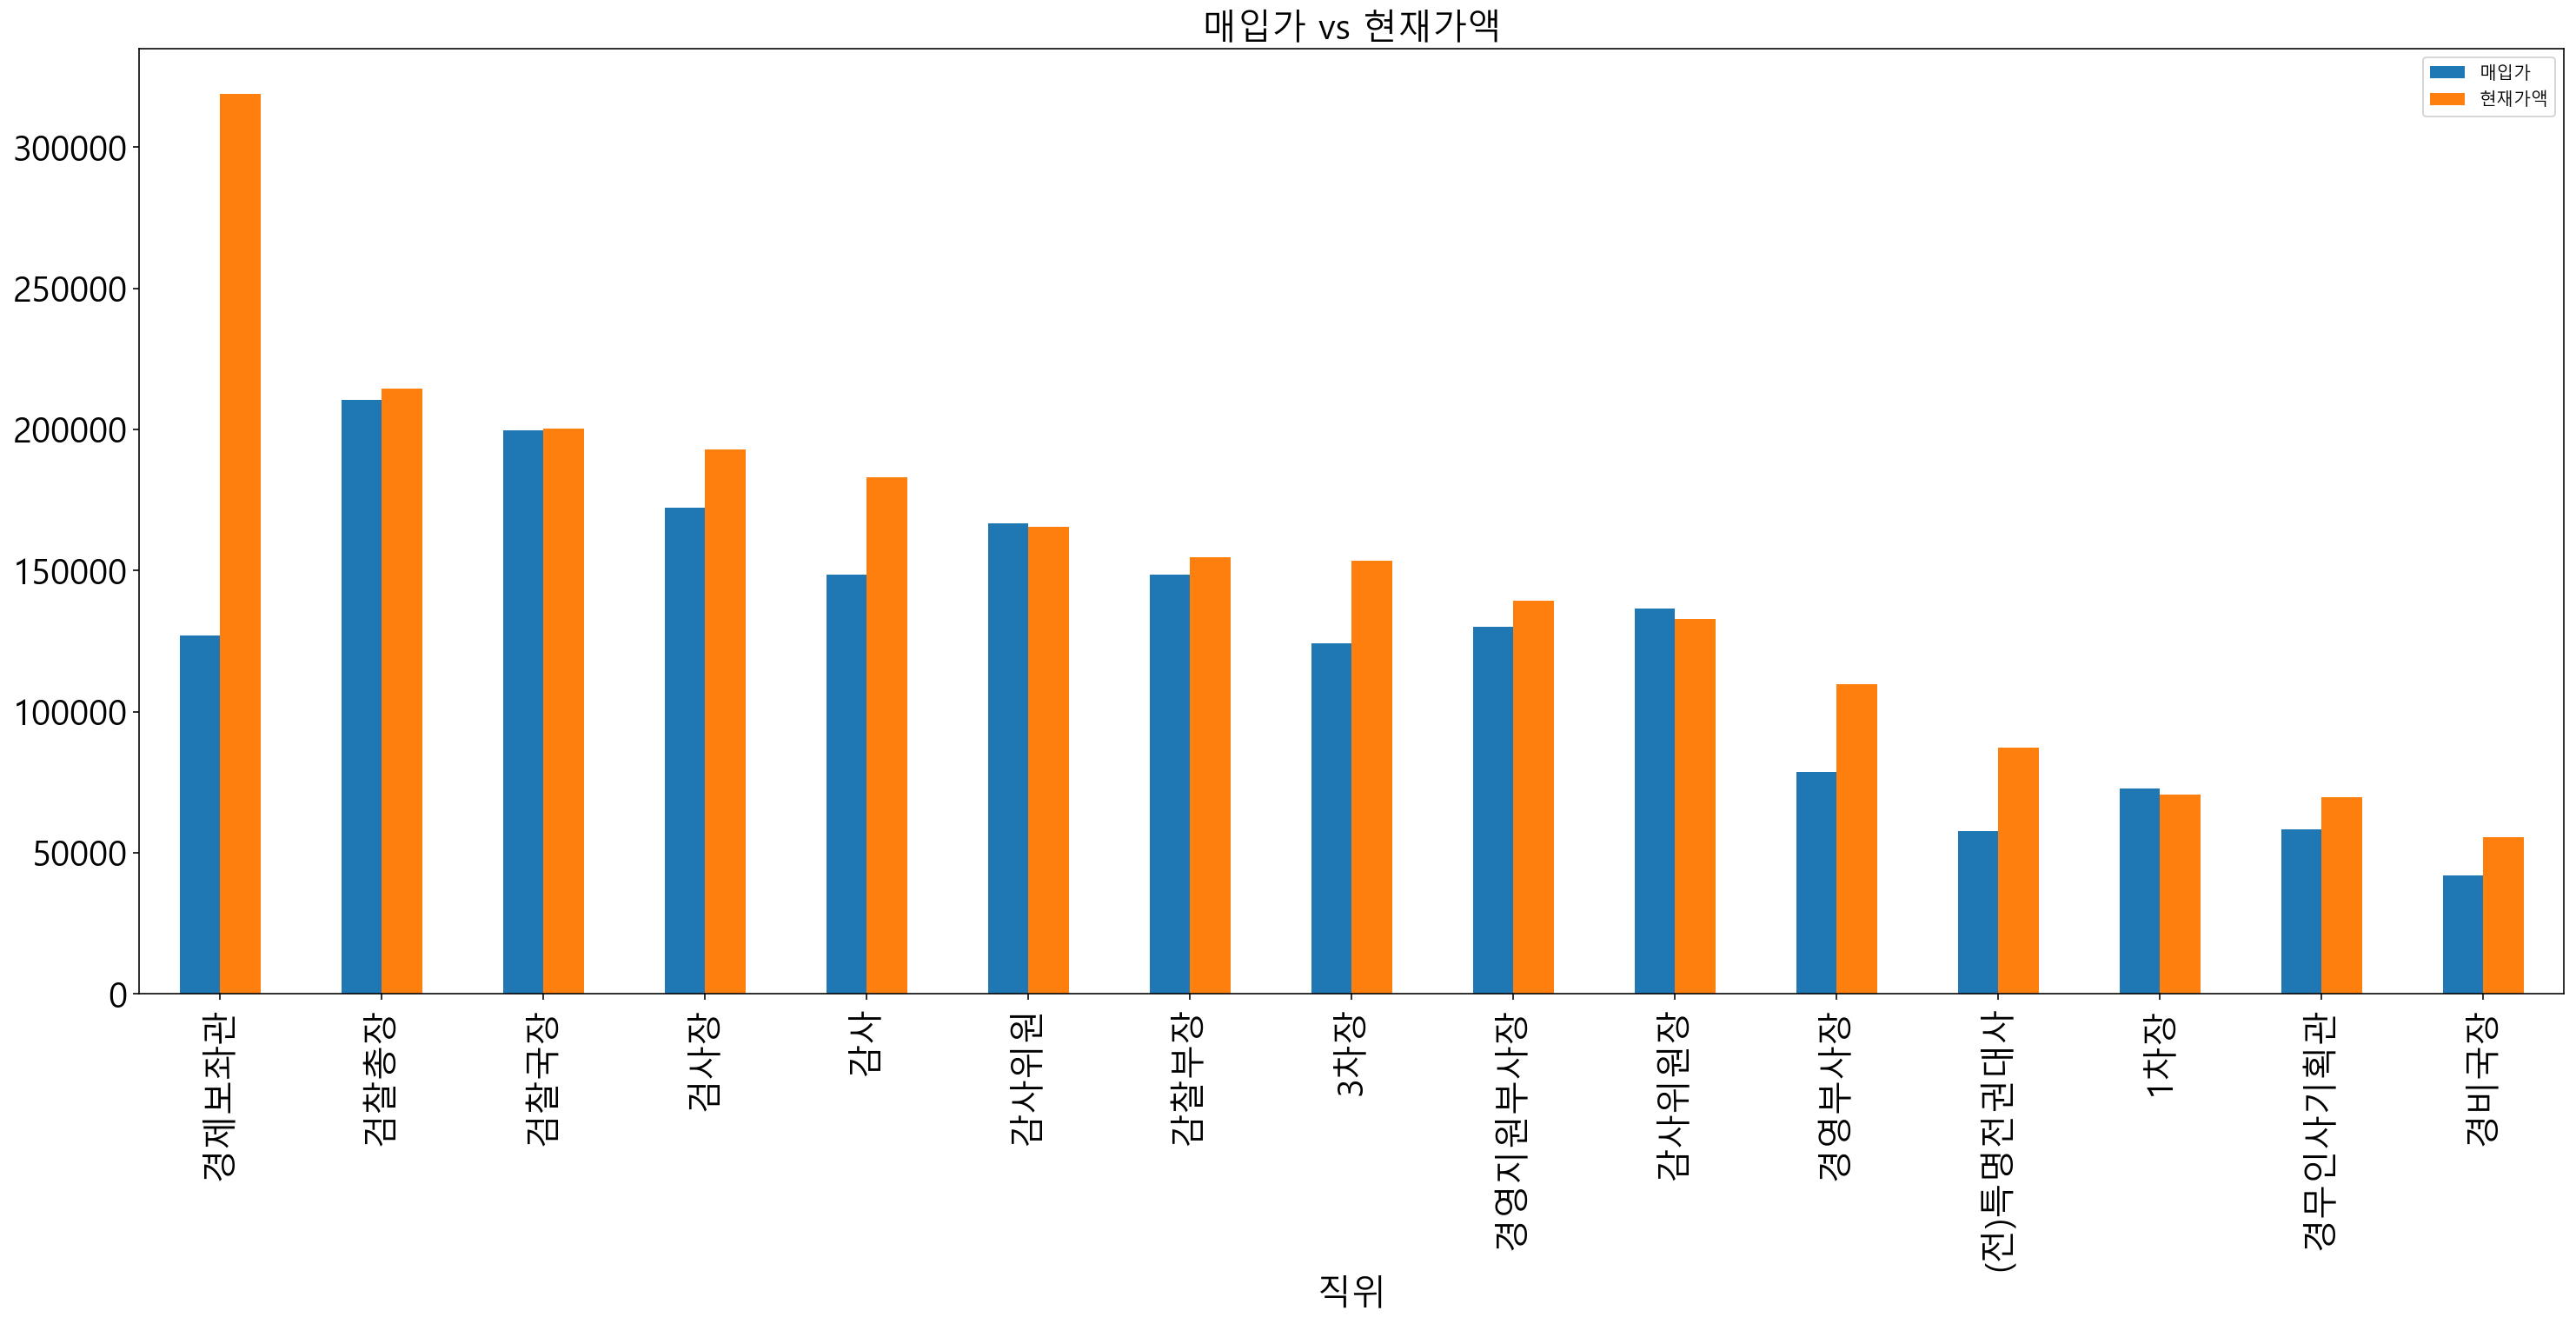

In [19]:
# 매입가 vs 현재가액 막대그래프로 차이 보기

asset1.plot.bar(fontsize = 20, figsize = (25, 10))
plt.title('매입가 vs 현재가액', fontsize = 20)
plt.xlabel('직위',fontsize = 20)

### ⭐️ 해석
    직위별로 매입가(파란막대)와 현재가(주황막대)를 비교한 시각화 결과물이다. 주황막대 - 파란막대는 결국 증가액이 되는데, 주황막대가 파란막대보다 더 길수록 시세차익을 내어 이득을 본 경우라고 해석할 수 있다. 그렇게 보니, 경제보좌관의 증가액이 매우 크다는 것을 확인할 수 있었다.

-----------

### 지역(구)별 증가액 보기

In [20]:
seoul = asset[asset['소재지'].str.contains('서울특별시')]
Area = []
for i in seoul['소재지']:
    Area.append(i.split()[1])

In [21]:
Area = pd.DataFrame(Area)
Area = Area.rename(columns = {0:'지역(구)'})

In [22]:
Area.head()

,지역(구)
0,서초구
1,용산구
2,강남구
3,강남구
4,강남구


In [23]:
seoul.set_index('직위')

,대분류,본인과의 관계,재산의 종류,소재지,매입가,증가액,증가액_실거래가,감소액,감소액_실거래가,현재가액,변동사유
직위,,,,,,,,,,,
국회의장,건물,본인,아파트,서울특별시 서초구 반포동 반포아파트 건물 196.80㎡,3961000.0,165000,0,0.0,0,4126000,공시가격 증가
국회의장,건물,본인,아파트(전세(임차)권),서울특별시 용산구 이촌동 타워맨션 건물 202.45㎡ (건물 202.45㎡ 증가),0.0,1400000,0,0.0,0,1400000,전세권(신규)
국회부의장,토지,배우자,임야,"서울특별시 강남구 도곡동 산 32-1번지 17,094.00㎡ 중1,899.33㎡",783664.0,81290,0,0.0,0,864954,가액변동
국회부의장,건물,본인,아파트,서울특별시 강남구 압구정동 신현대아파트 건물 183.41㎡ 중 91.70㎡,1600000.0,245000,0,0.0,0,1845000,가액변동
국회부의장,건물,배우자,아파트,서울특별시 강남구 압구정동 신현대아파트 건물 183.41㎡ 중 91.70㎡,1600000.0,245000,0,0.0,0,1845000,가액변동
...,...,...,...,...,...,...,...,...,...,...,...
교육감,건물,장남,근린생활시설 (전세(임차)권),서울특별시 마포구 합정동 벨라비스타 대지 0.00㎡ 중 0.00㎡건물 0.00㎡ (...,25000.0,0,0,25000.0,0,0,변동없음
교육감,건물,장남,근린생활시설 (전세(임차)권),서울특별시 관악구 봉천동 미림빌딩 건물 297.62㎡ 중 20.00㎡ (건물 지분면...,0.0,20000,0,0.0,0,20000,변동없음
교육감,건물,본인,상가,서울특별시 강남구 역삼동 건물 84.66㎡,511425.0,6180,0,0.0,0,517605,가액변동


In [24]:
seoul = seoul.reset_index()

In [25]:
seoul = seoul.drop(['index'], axis = 1)

In [26]:
seoul = pd.concat([seoul, Area], axis = 1)

In [27]:
seoul

,직위,대분류,본인과의 관계,재산의 종류,소재지,매입가,증가액,증가액_실거래가,감소액,감소액_실거래가,현재가액,변동사유,지역(구)
0,국회의장,건물,본인,아파트,서울특별시 서초구 반포동 반포아파트 건물 196.80㎡,3961000.0,165000,0,0.0,0,4126000,공시가격 증가,서초구
1,국회의장,건물,본인,아파트(전세(임차)권),서울특별시 용산구 이촌동 타워맨션 건물 202.45㎡ (건물 202.45㎡ 증가),0.0,1400000,0,0.0,0,1400000,전세권(신규),용산구
2,국회부의장,토지,배우자,임야,"서울특별시 강남구 도곡동 산 32-1번지 17,094.00㎡ 중1,899.33㎡",783664.0,81290,0,0.0,0,864954,가액변동,강남구
3,국회부의장,건물,본인,아파트,서울특별시 강남구 압구정동 신현대아파트 건물 183.41㎡ 중 91.70㎡,1600000.0,245000,0,0.0,0,1845000,가액변동,강남구
4,국회부의장,건물,배우자,아파트,서울특별시 강남구 압구정동 신현대아파트 건물 183.41㎡ 중 91.70㎡,1600000.0,245000,0,0.0,0,1845000,가액변동,강남구
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3306,교육감,건물,장남,근린생활시설 (전세(임차)권),서울특별시 마포구 합정동 벨라비스타 대지 0.00㎡ 중 0.00㎡건물 0.00㎡ (...,25000.0,0,0,25000.0,0,0,변동없음,마포구
3307,교육감,건물,장남,근린생활시설 (전세(임차)권),서울특별시 관악구 봉천동 미림빌딩 건물 297.62㎡ 중 20.00㎡ (건물 지분면...,0.0,20000,0,0.0,0,20000,변동없음,관악구
3308,교육감,건물,본인,상가,서울특별시 강남구 역삼동 건물 84.66㎡,511425.0,6180,0,0.0,0,517605,가액변동,강남구
3309,교육감,채무,본인,건물임대채무,서울특별시 강남구 역삼동 건물 임대보증금,15000.0,0,0,0.0,0,15000,변동없음,강남구


In [28]:
# 증가액 기준 정렬

seoul_sort = seoul.groupby('지역(구)')[['증가액']].agg('mean')[1:].sort_values('증가액', ascending = False)
seoul_sort

,증가액
지역(구),
구로구,160862.770833
서초구,125837.131183
마포구,109401.314286
송파구,105873.573840
강남구,103881.854978
강동구,95578.009804
성동구,89096.489796
양천구,85255.970370
종로구,78506.387931


<AxesSubplot:xlabel='지역(구)'>

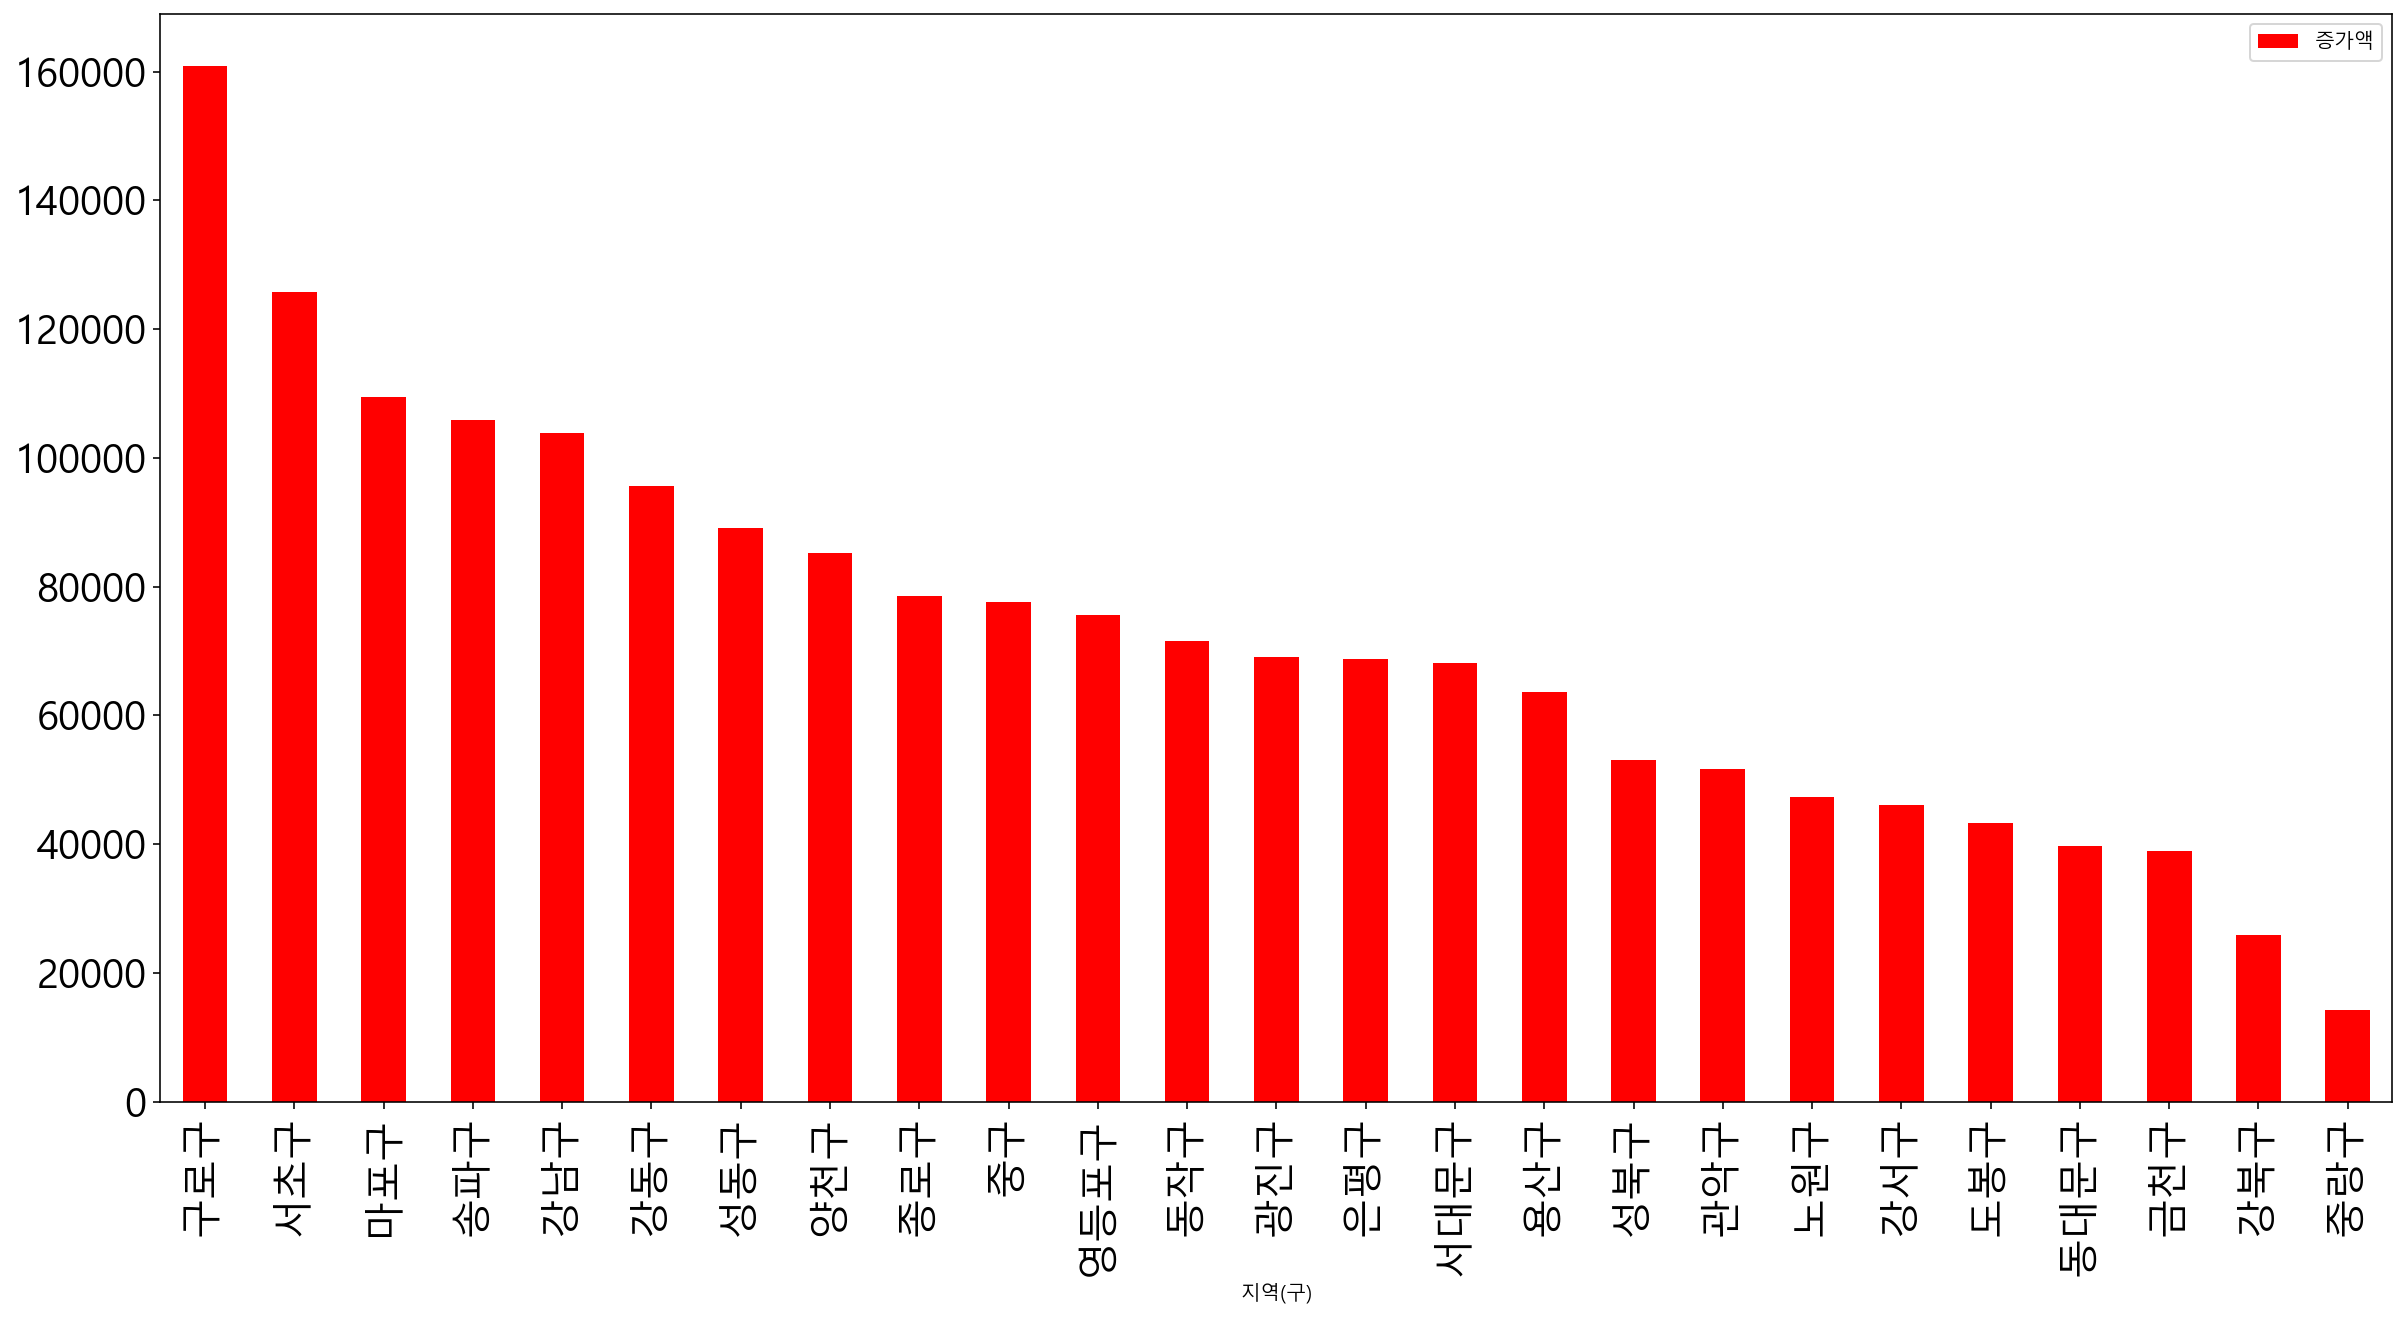

In [29]:
# 구별로 증가액을 나타내 보았다.

seoul_sort.plot.bar(fontsize = 20, figsize = (20, 10), color='r')

### ⭐️ 해석
    
    지역(구)별로 증가액을 시각화를 진행하였다. 지역은 사전에 서울지역만 관찰하기 위해 서울만 따로 변수로 만들어주어, 그 중에 '구'에 해당하는 부분만 뽑았다. 그 후 증가액을 보기위 시각화를 진행해보니 구로구에서 압도적으로 증가액이 높았던것을 확인할 수 있었다. 따라서 구로구에 재산을 매입한 공직자는 매우 이득을 본 상태라고 볼 수 있다.
    
    실제 기사를 통해 구로구의 집값의 증감률이 가장 높은것을 확인할 수 있었다.

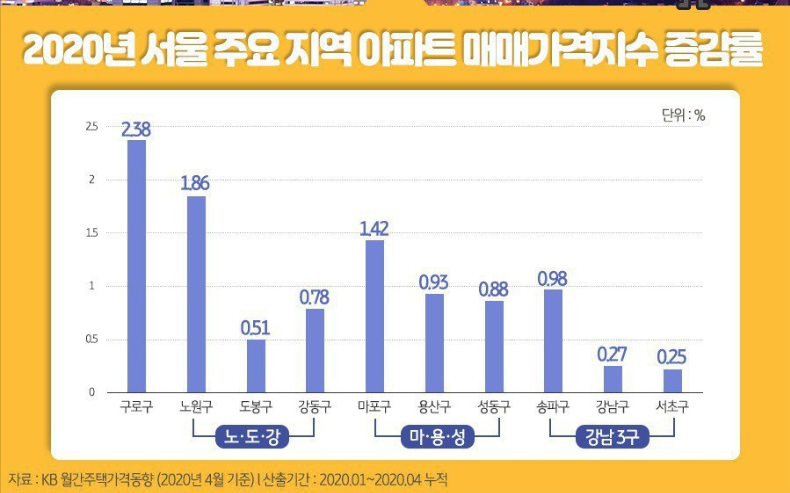

<출처: https://www.mk.co.kr/news/realestate/view/2020/05/551740/>

----------

### 대분류별 시각화


<AxesSubplot:>

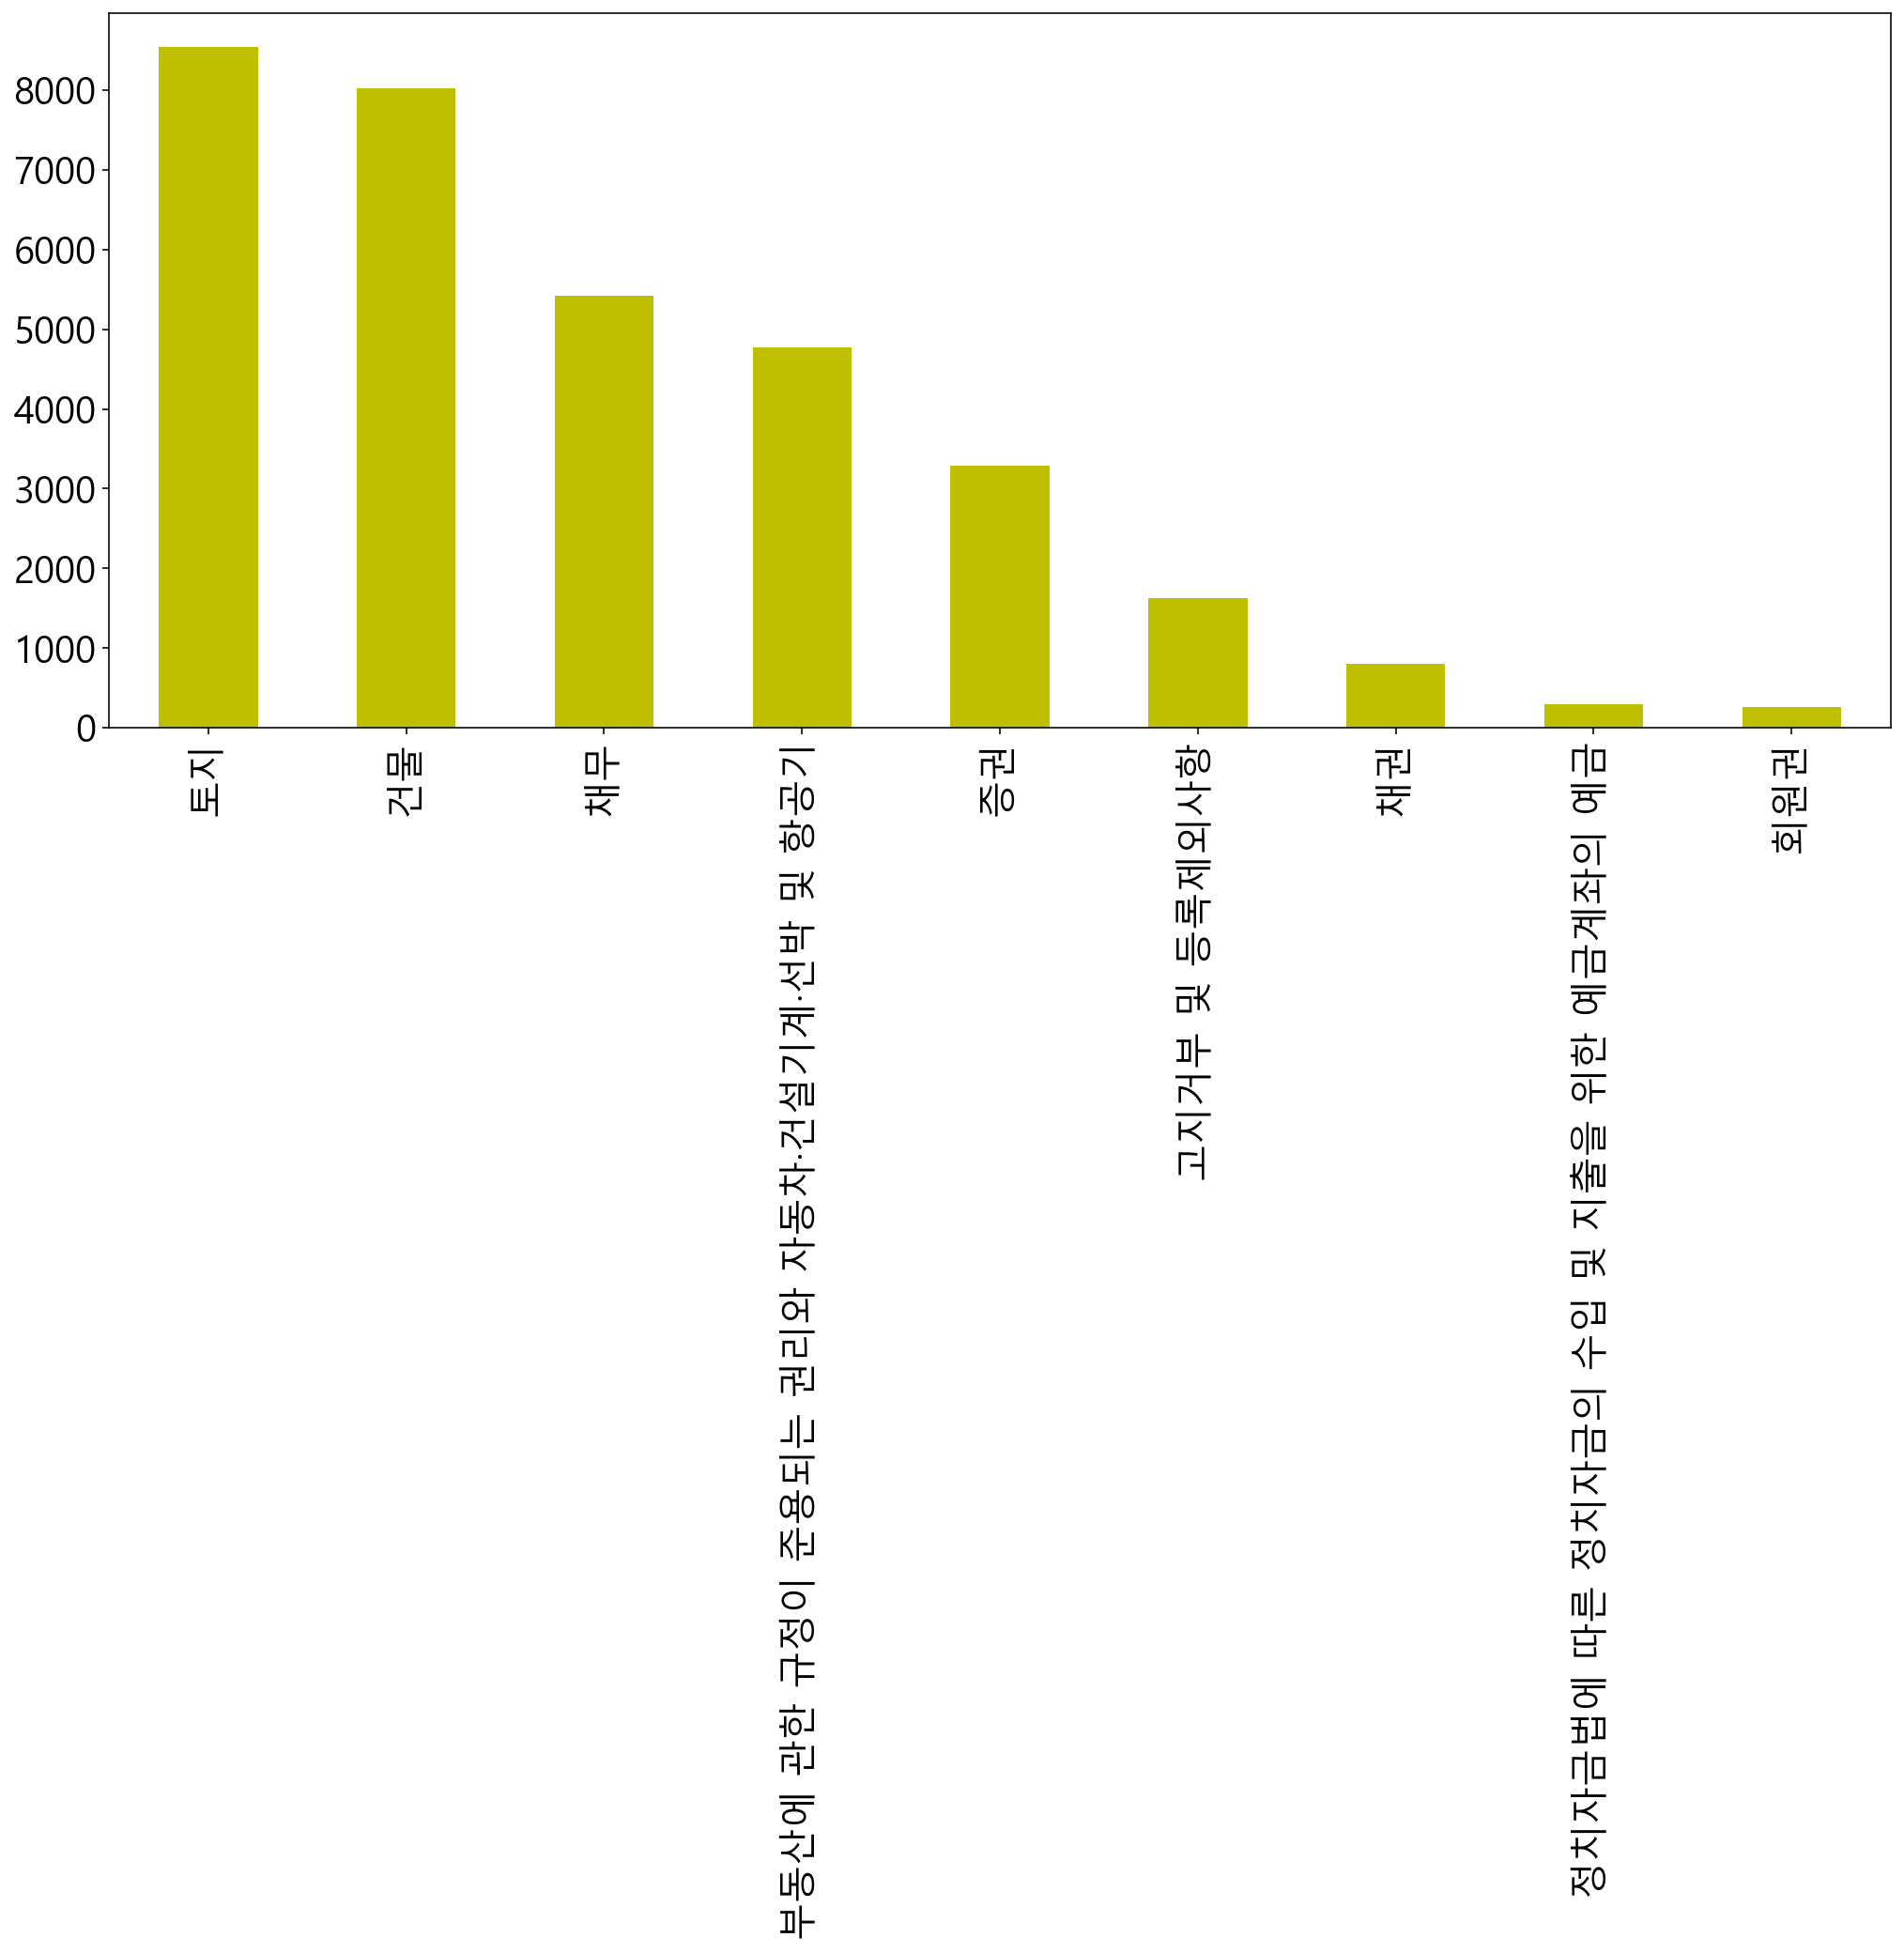

In [30]:
# 어떠한 재산이 가장 많은지 확인하였다.

asset['대분류'].value_counts()[1:10].plot(kind = 'bar', fontsize = 20, figsize = (17, 7), color='y')

### ⭐️ 해석
    공직자의 재산종류(대분류)를 value_counts()를 이용하여 시각화해 보니, 토지와 건물이 가장 많은 빈도수를 차지한것을 알 수 있었다.

---

<AxesSubplot:xlabel='대분류'>

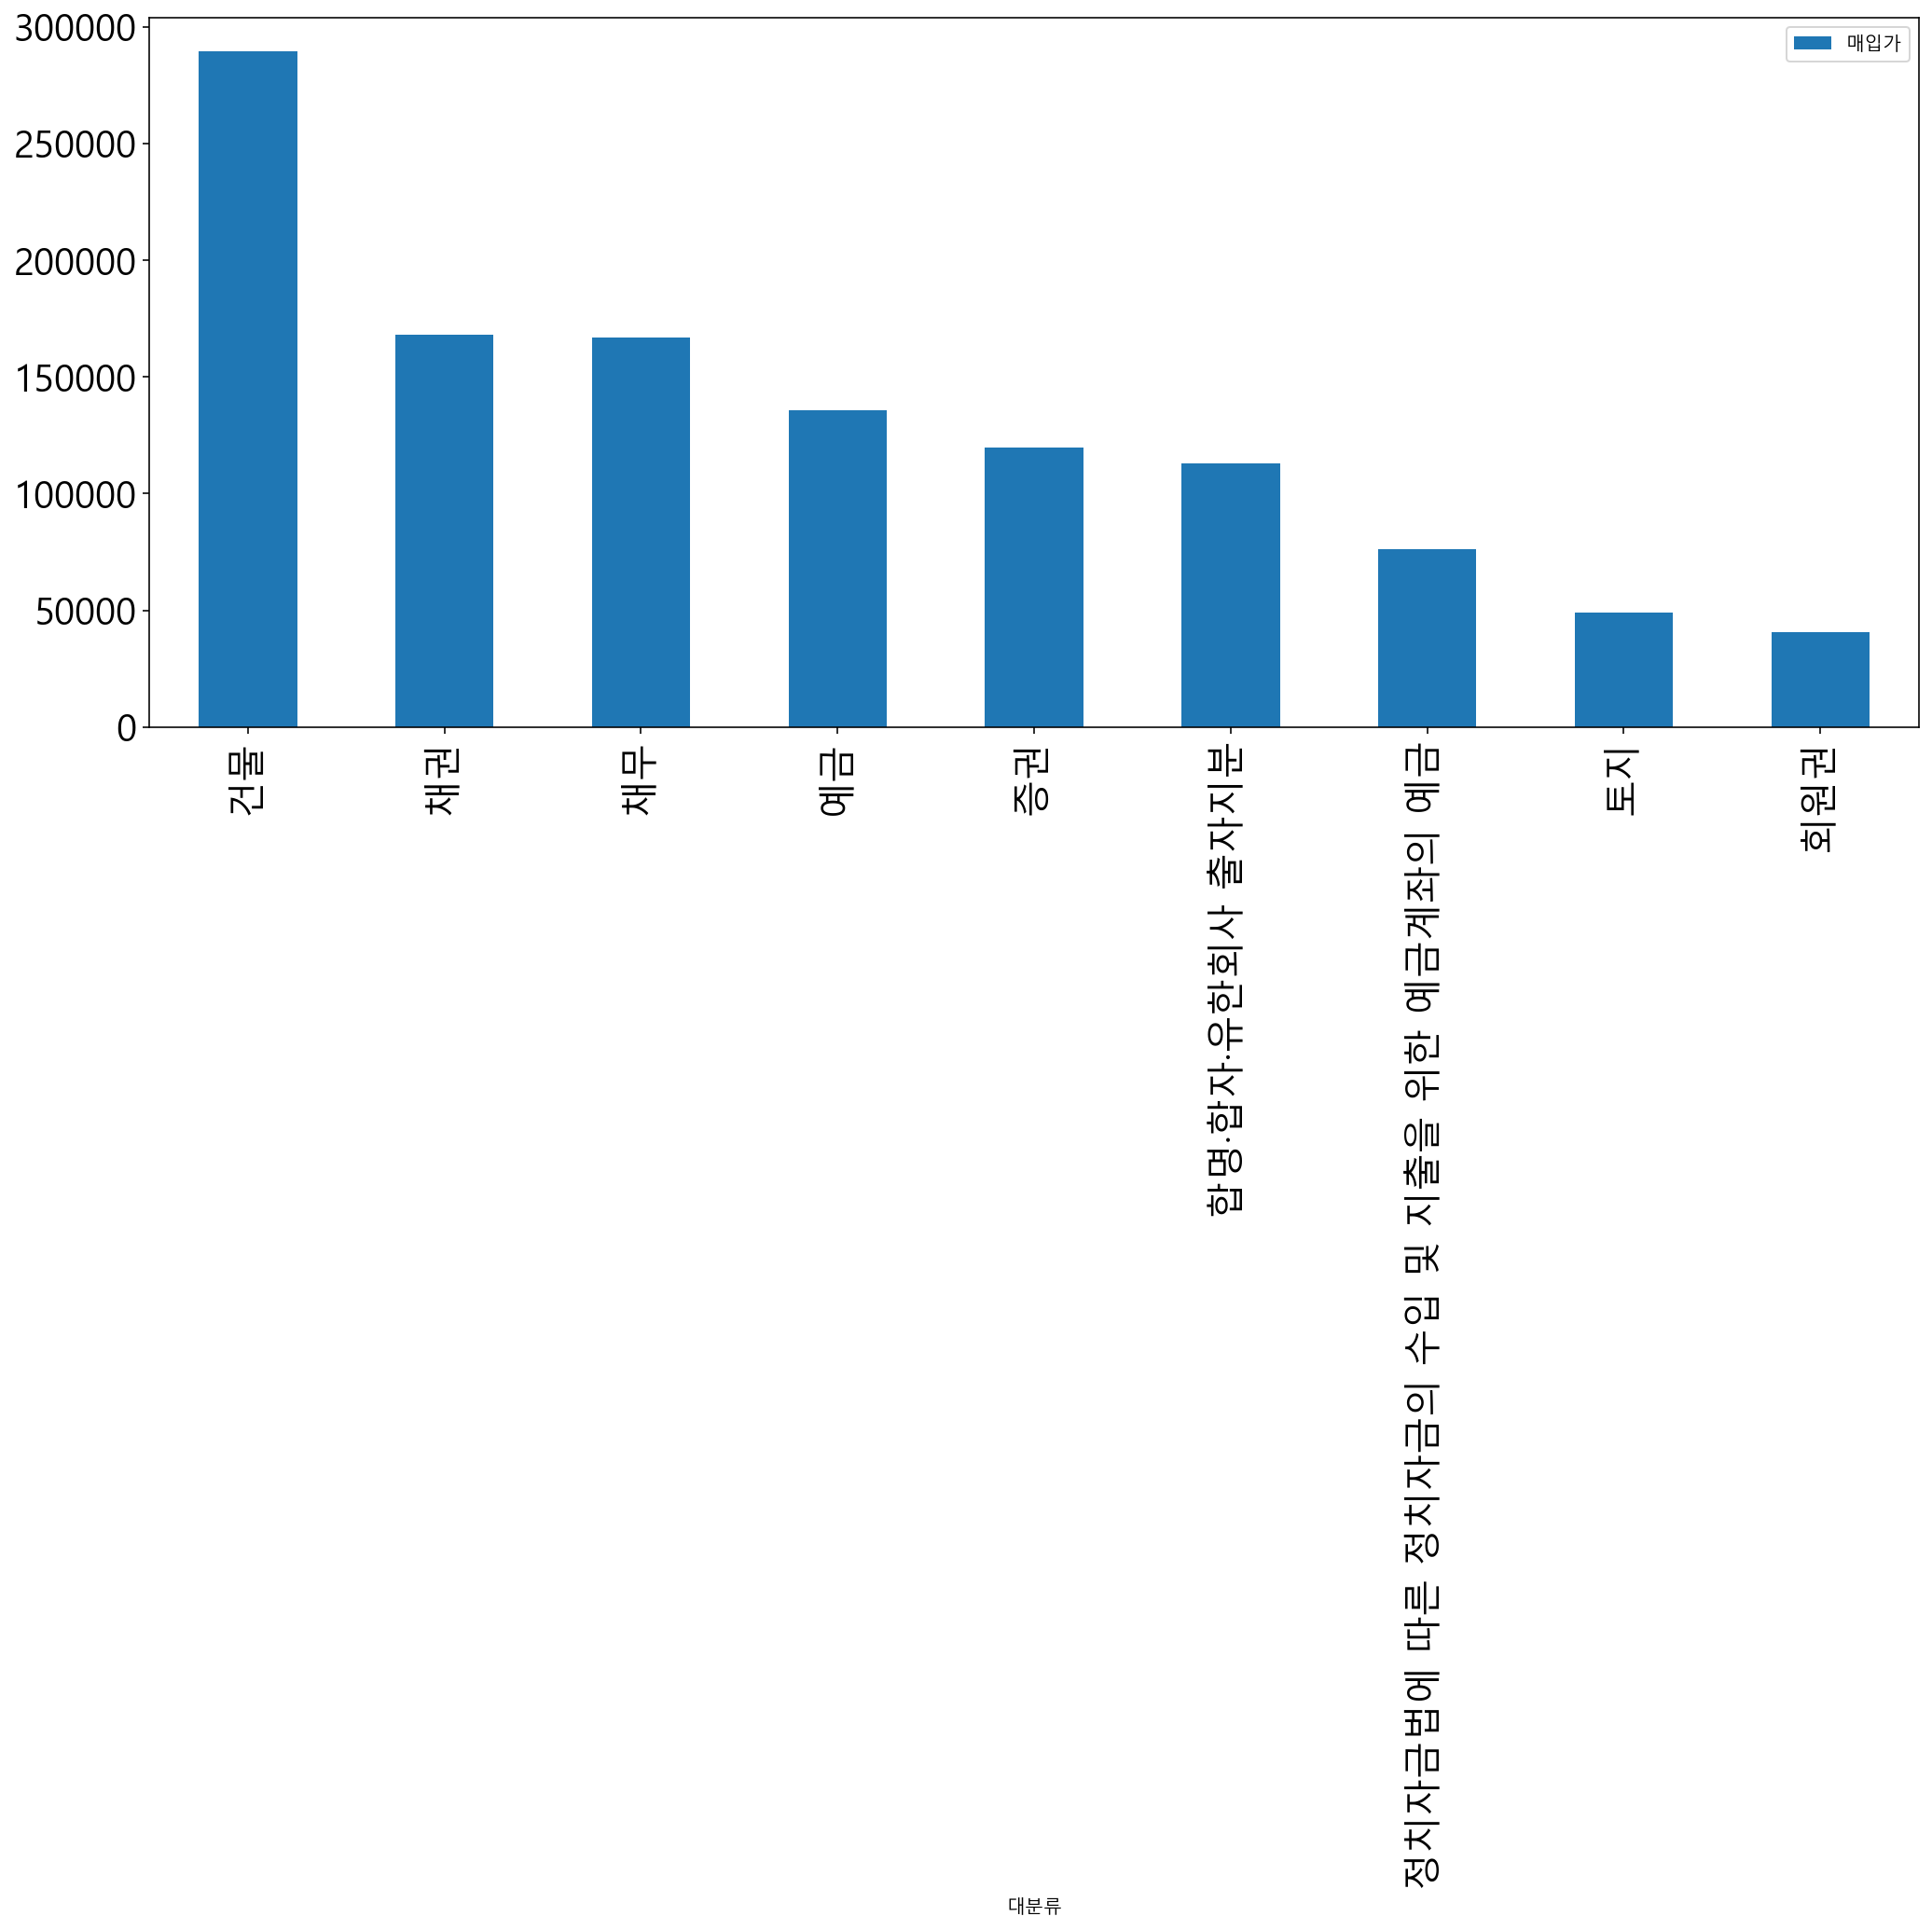

In [31]:
# 대분류를 기준으로 매입가의 평균을 확인

asset1 = round(asset.groupby('대분류').agg('mean')[['매입가']], 2)
asset1 = asset1.reset_index()
asset1 = asset1.sort_values('매입가', ascending = False).head(9)
asset1.plot(kind = 'bar', x = '대분류', y = '매입가',  fontsize = 20, figsize = (17,7))

### ⭐️ 해석 
    대분류를 기준으로 매입가의 평균을 시각화 하였다. 그 결과, 건물의 매입가격이 다른 대분류에 비해 약 2배이상이었고, 토지가 예상외로 낮은 순위에 위치해 있었다. 추가로 분석을 진행해보니 의외였던 부분은, 채권과 채무가 상당히 높은 순위에 있다는것 이었다.
    
    추가로 건물이 1순위를 차지하여서 증가액또한 가장 높을것으로 예상이 된다.

---

<AxesSubplot:xlabel='대분류'>

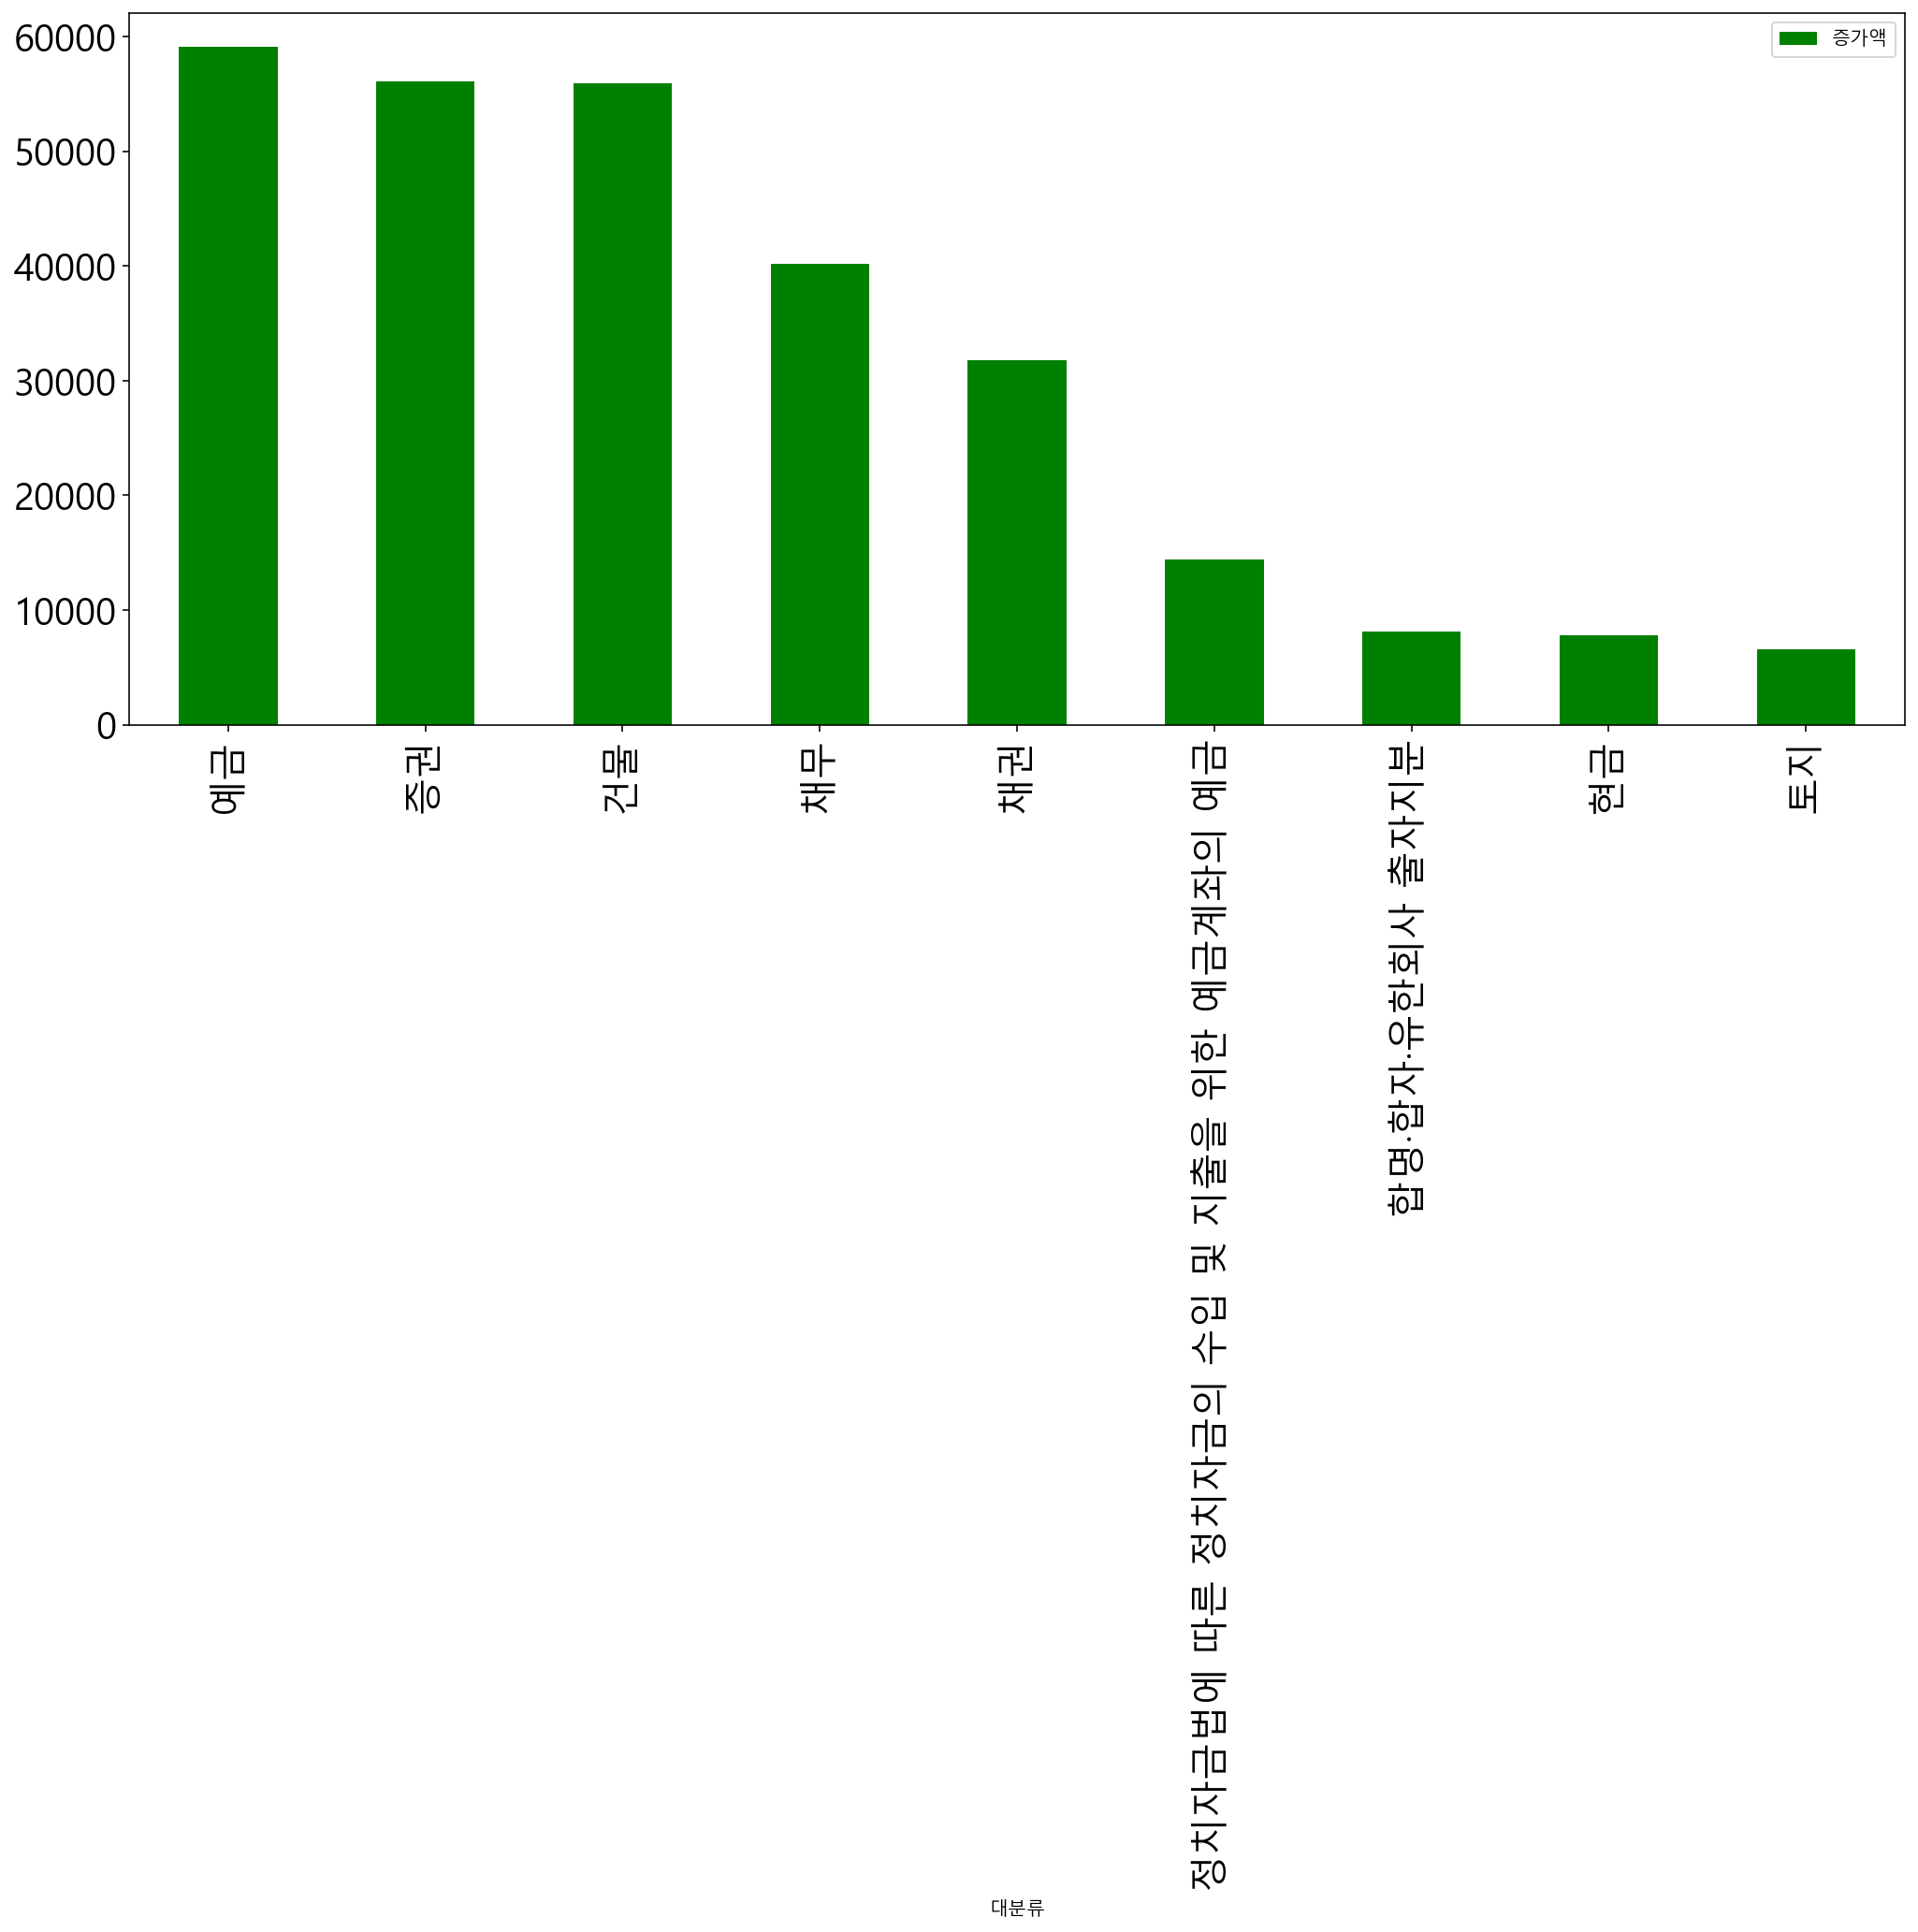

In [32]:
# 위의 결과를 토대로 건물이 1순위를 차지하여서 증가액또한 가장 높을것으로 예상이 된다. 

asset1 = round(asset.groupby('대분류').agg('mean')[['증가액']], 2)
asset1 = asset1.reset_index()
asset1 = asset1.sort_values('증가액', ascending = False).head(9)
asset1.plot(kind = 'bar', x = '대분류', y = '증가액',  fontsize = 20, figsize = (17,7), color='g')

### ⭐️ 해석

    대분류를 그룹으로 묶어서 증가액의 평균을 시각화하였다. 원래 예상으로는 건물과 토지의 증가액이 가장 높을것으로 예상했지만, 예상과 다르게 예금, 증권이 가장 높은것을 확인할 수 있었다. 예금은 항상 꾸준했으며 증권이 높은이유는 한때 가상화폐, 주식 등이 한창 붐을 이루고 있었기 때문이라고 생각한다.
   

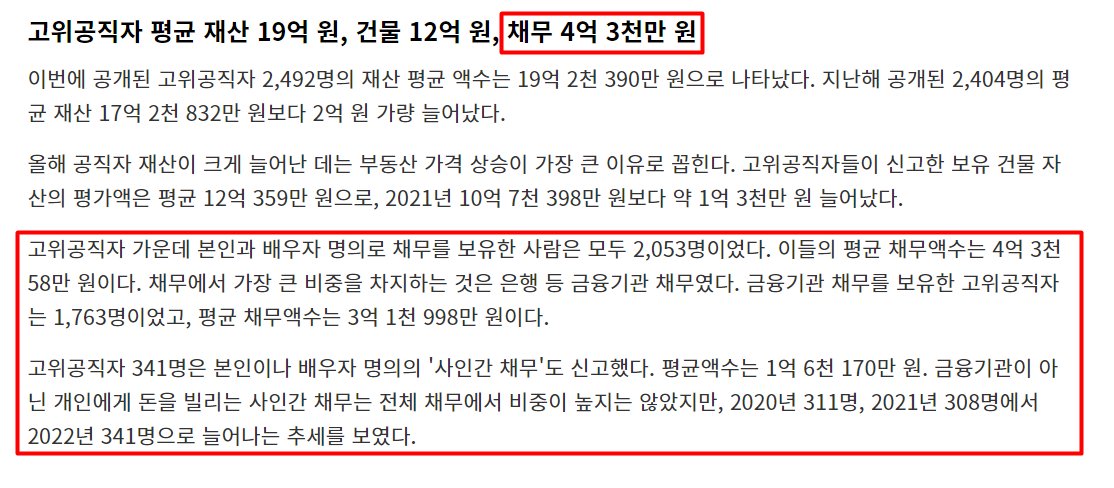

<출처: https://newstapa.org/article/znz45>

----

### 직위별 재산 순위 알아보기

Text(0.5, 1.0, '직위별 재산 순위')

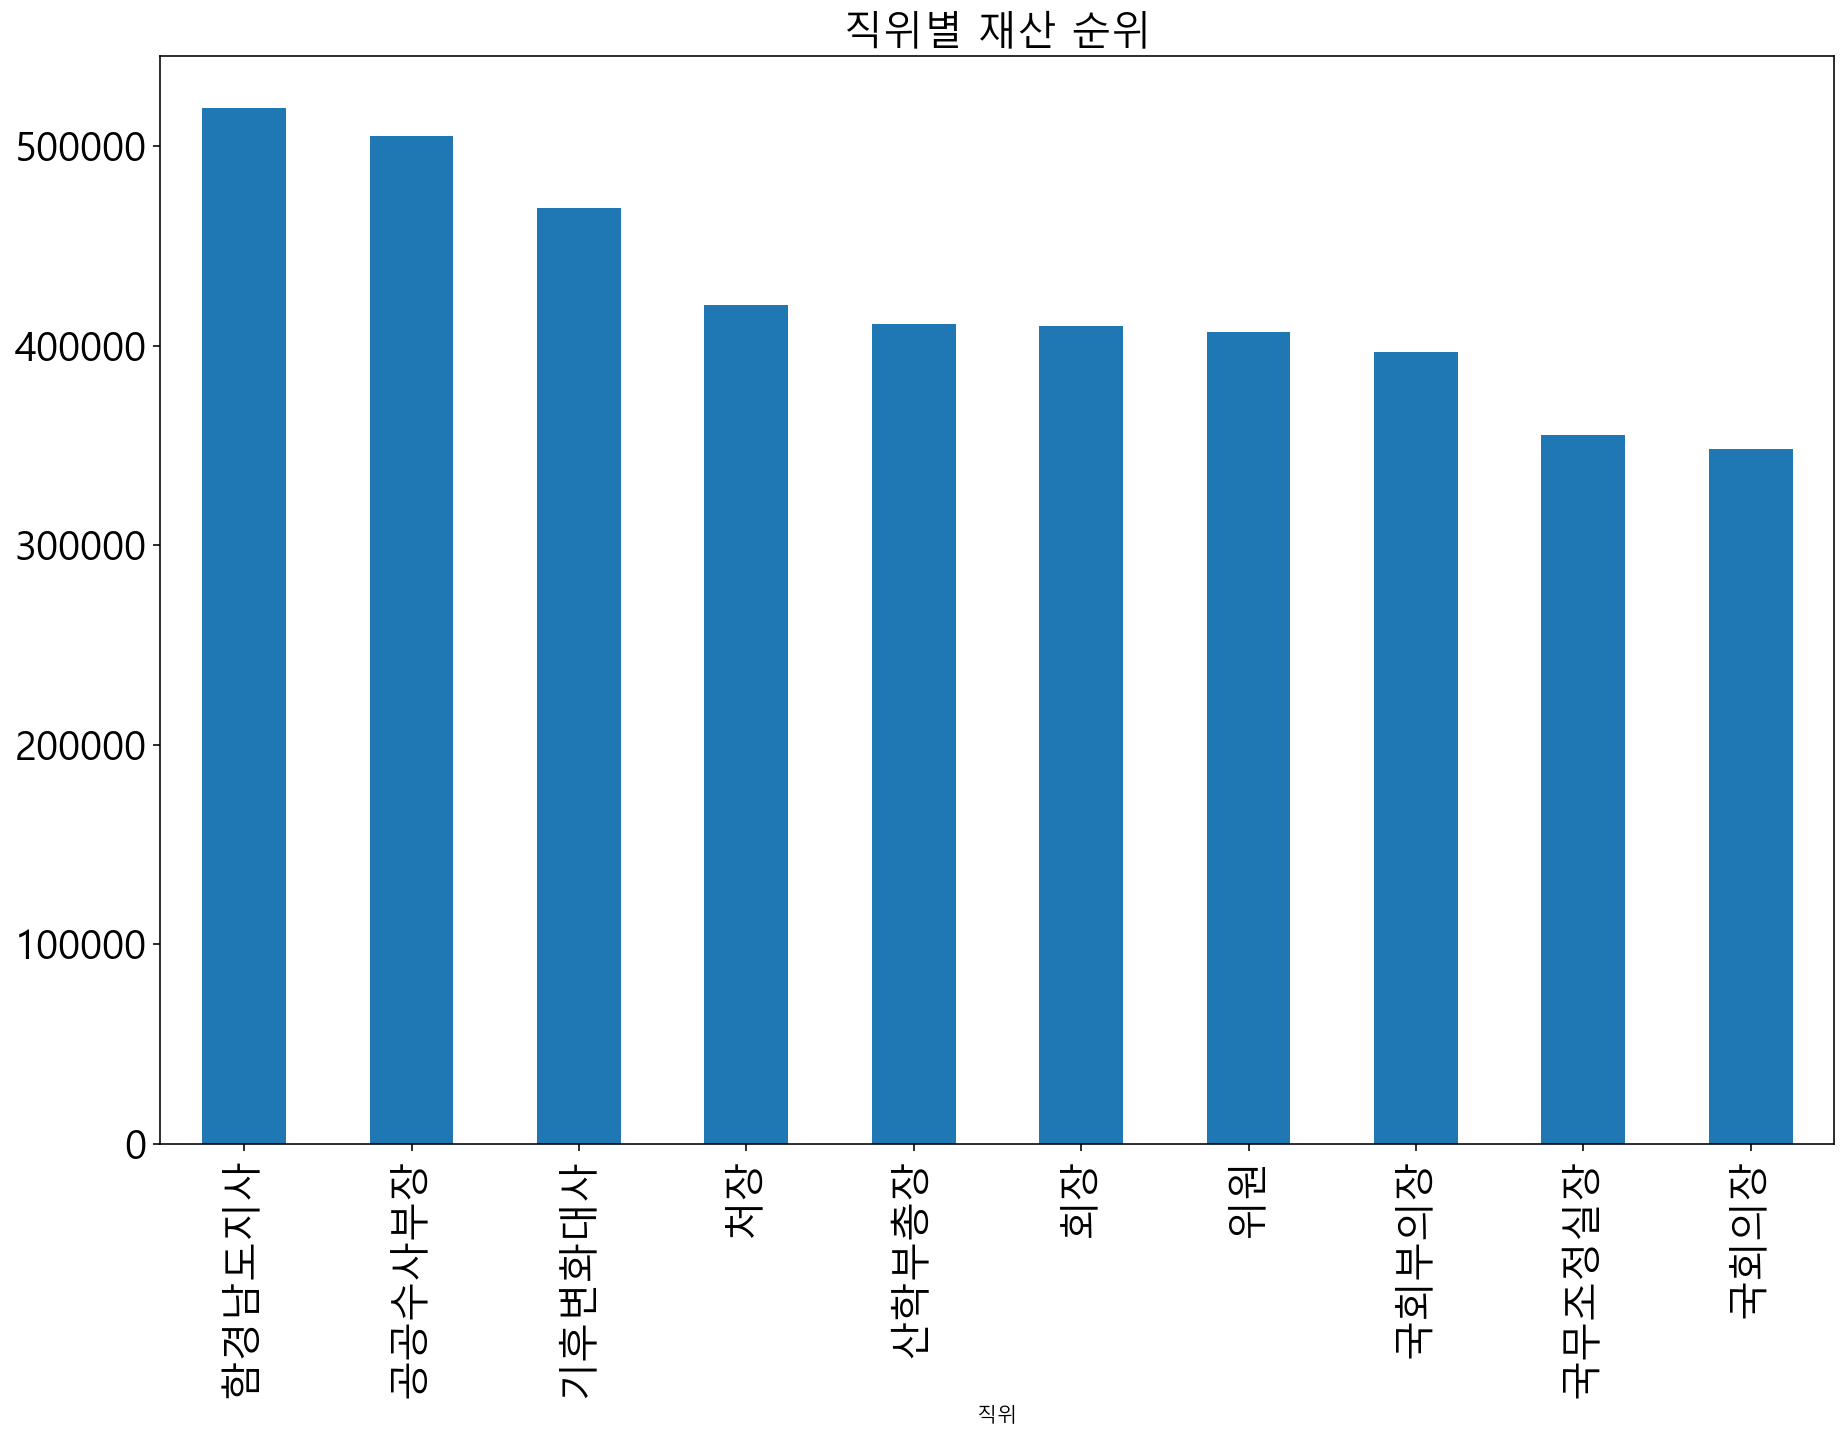

In [61]:
asset_top10 = asset.groupby('직위').agg('mean')['현재가액'].sort_values(ascending = False).head(10)
asset_top10.plot.bar(fontsize = 20, figsize = (15,10))
plt.title('직위별 재산 순위', fontsize = 20)

### ⭐️ 해석

    직위별로 그룹핑을 시켜 현재 재산을 평균내어 탑10까지 시각화한 결과, 함경남도지사 공공수사부장 기후변화대사의 직위를 가진사람의 평균 재산이 1위부터 3위에 머물러있음을 알 수 있었다.

----

Text(0.5, 0, '직위')

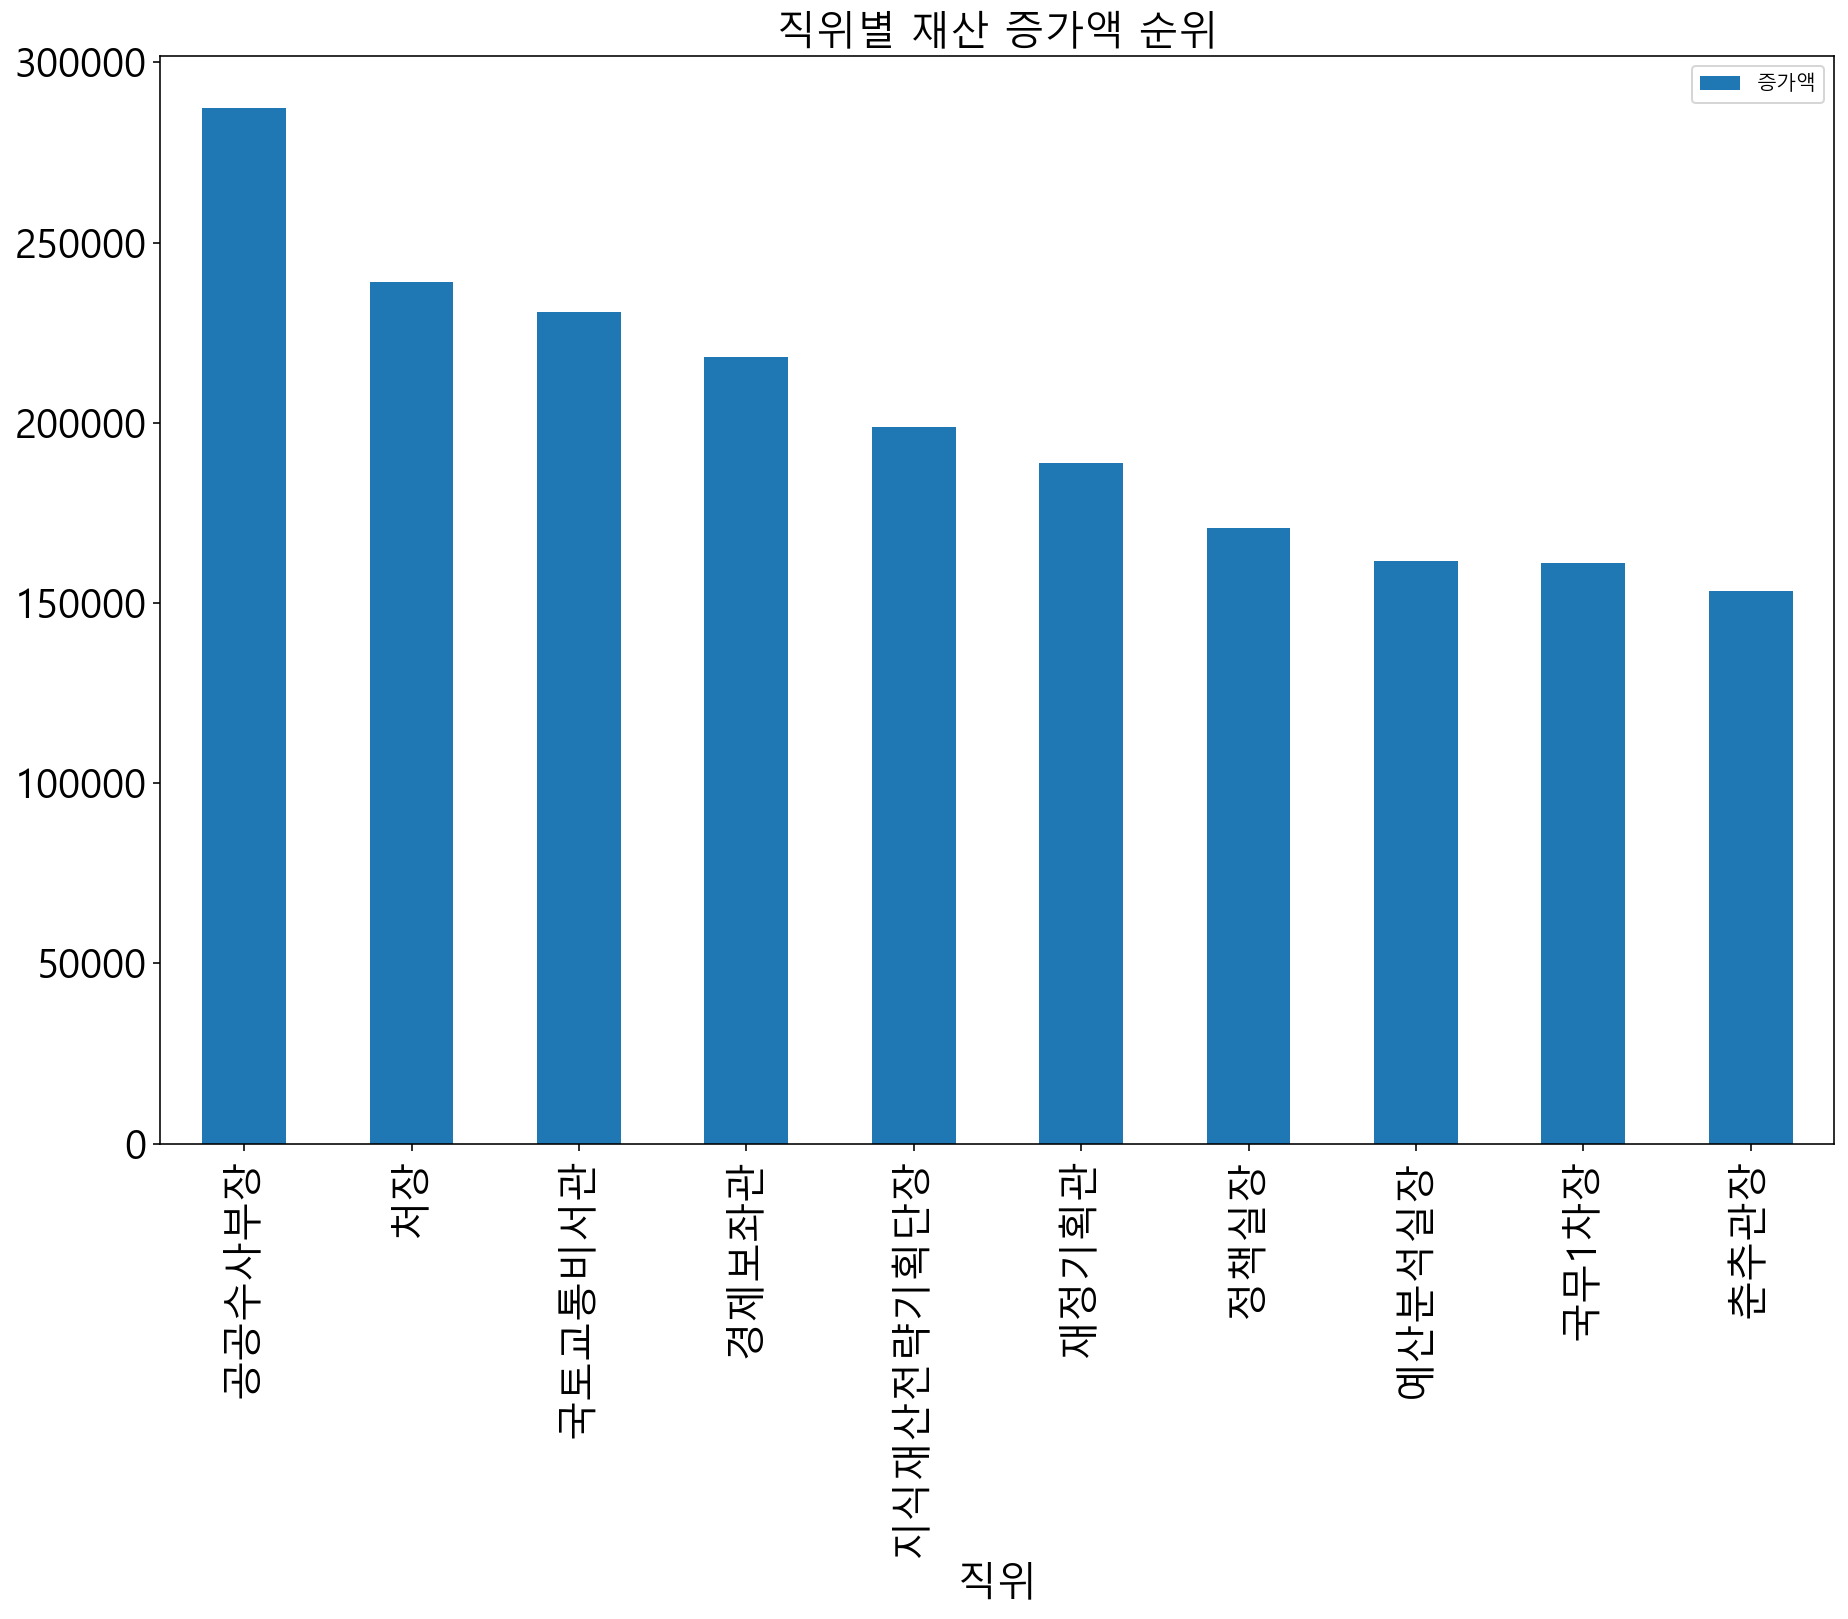

In [59]:
# 직위로 그룹화 하여 증가액의 평균을 순서대로 10개 뽑아줌
asset3 = asset.groupby('직위')[['증가액']].agg('mean').sort_values('증가액', ascending = False).head(10)
# 직위별 재산의 증가액 평균 순위확인
asset3.plot.bar(fontsize = 20, figsize = (15,10))
plt.title('직위별 재산 증가액 순위', fontsize = 20)
plt.xlabel('직위', fontsize = 20)

### ⭐️ 해석

직위명이 생소하여 검색을 해보니, 공공수사부장은 대한민국 공공의 안전을 저해하는 공안사건 수사의 사령탑이며 검사장급 직위인것을 확인하였다.

공공수사부장의 증가액이 가장 높은 것을 확인할 수 있었다. 다음으로 처장, 국토교총비서관 경제보좌관 순으로 증가액이 높았다.  공공수사부는 대한민국의 59개 지방검찰청 및 관할 지청의 공안 전담 검사들을 지휘하는 부서이다.

---

### 특성별 상관관계 알아보기

In [33]:
asset.corr()

,매입가,증가액,증가액_실거래가,감소액,감소액_실거래가,현재가액
매입가,1.000000,0.349290,-0.014283,0.314632,0.056593,0.941338
증가액,0.349290,1.000000,0.249592,0.268122,-0.009124,0.584775
증가액_실거래가,-0.014283,0.249592,1.000000,-0.011567,-0.003569,0.072007
감소액,0.314632,0.268122,-0.011567,1.000000,0.281130,0.157243
감소액_실거래가,0.056593,-0.009124,-0.003569,0.281130,1.000000,-0.012108
현재가액,0.941338,0.584775,0.072007,0.157243,-0.012108,1.000000


<AxesSubplot:>

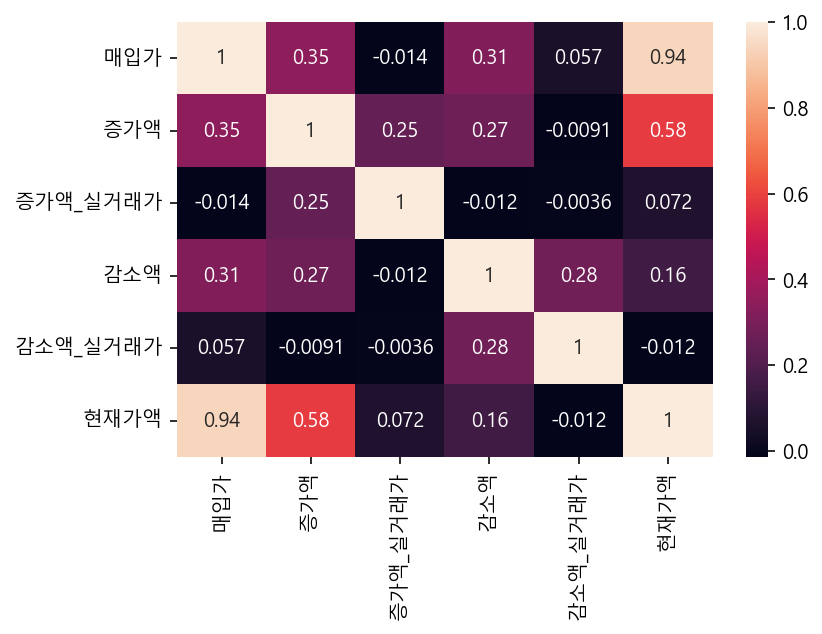

In [35]:
import seaborn as sns
sns.heatmap(asset.corr(), annot = True)

### ⭐️ 해석
    현재가액과 매입가 컬럼의 상관관계가 매우 높은것을 알 수 있다. 매입했을시 당시와 시간이 지난후 현재가격의 변동은 큰 차이가 대부분 없기 때문에 둘의 상관관계가 높은것으로 보인다. 또한 증가액과 현재가액의 관계또한 어느정도 관계가 있는것으로 나타나는데, 통상 증가액이 높아질 수록 현재가액도 높아지기 때문인것으로 보인다.

----

### 서울지역과 서울외의 지역의 증가액비율 확인

In [36]:
# 소재지 서울 VS 서울 외를 보기 위해
# group으로 대분류 - 토지, 건물로 묶고 진행

asset1 = round(asset.groupby(['대분류','소재지']).agg('mean'), 2)
asset1 = asset1.reset_index()
asset1 = asset1.sort_values('매입가', ascending = False)
asset2 = asset1[asset1['대분류'].str.contains('토지')]
asset3 = asset1[asset1['대분류'].str.contains('건물')]
asset4 =  pd.concat([asset2, asset3])
asset4.head()

,대분류,소재지,매입가,증가액,증가액_실거래가,감소액,감소액_실거래가,현재가액
29047,토지,경기도 용인시 기흥구 영덕동 1052-5번지 997.50㎡,4000000.0,0.0,0.0,0.0,0.0,4000000.0
28742,토지,"경기도 수원시 영통구 망포동 424-1번지 1,566.00㎡",3733344.0,0.0,0.0,0.0,0.0,3733344.0
31858,토지,서울특별시 송파구 잠실동 196-19번지 255.70㎡,3106755.0,242915.0,0.0,0.0,0.0,3349670.0
31854,토지,서울특별시 송파구 잠실동 196-17번지 273.70㎡ 중191.60㎡,2327940.0,182020.0,0.0,0.0,0.0,2509960.0
31791,토지,"서울특별시 강북구 우이동 86-4번지 1,987.00㎡",2304920.0,168895.0,0.0,0.0,0.0,2473815.0


In [37]:
#건물, 토지의 데이터 중 서울 소재지 확인 (contains 포함된 문자)
asset5 = asset4[asset4['소재지'].str.contains('서울특별시')]
asset5.head()

,대분류,소재지,매입가,증가액,증가액_실거래가,감소액,감소액_실거래가,현재가액
31858,토지,서울특별시 송파구 잠실동 196-19번지 255.70㎡,3106755.0,242915.0,0.0,0.0,0.0,3349670.0
31854,토지,서울특별시 송파구 잠실동 196-17번지 273.70㎡ 중191.60㎡,2327940.0,182020.0,0.0,0.0,0.0,2509960.0
31791,토지,"서울특별시 강북구 우이동 86-4번지 1,987.00㎡",2304920.0,168895.0,0.0,0.0,0.0,2473815.0
31849,토지,서울특별시 송파구 잠실동 196-10번지 182.70㎡,2219805.0,173565.0,0.0,0.0,0.0,2393370.0
31786,토지,서울특별시 강남구 논현동 135-6번지 210.30㎡,2134545.0,431115.0,0.0,0.0,0.0,2565660.0


In [38]:
#건물, 토지의 데이터 중 서울 소재지 확인 (contains 포함된 문자)

asset6 = asset4[asset4['소재지'].str.contains('서울특별시') == False] 
asset6.head()

,대분류,소재지,매입가,증가액,증가액_실거래가,감소액,감소액_실거래가,현재가액
29047,토지,경기도 용인시 기흥구 영덕동 1052-5번지 997.50㎡,4000000.0,0.0,0.0,0.0,0.0,4000000.0
28742,토지,"경기도 수원시 영통구 망포동 424-1번지 1,566.00㎡",3733344.0,0.0,0.0,0.0,0.0,3733344.0
29086,토지,경기도 용인시 수지구 풍덕천동 산 24-70번지 0.00㎡ 중 0.00㎡ (총면적 ...,2070640.0,0.0,0.0,2070640.0,0.0,0.0
29604,토지,"경상남도 김해시 풍유동 2-5번지 0.00㎡ (1,687.00㎡감소)",1930772.0,0.0,0.0,1930772.0,0.0,0.0
29959,토지,"경상남도 진주시 정촌면 예하리 1364-1번지 1,455.00㎡중 1,455.00㎡",1660500.0,0.0,0.0,0.0,0.0,1660500.0


In [39]:
#전체지역
asset9 = asset4[['증가액']].sum()
asset9

증가액    4.607747e+08
dtype: float64

In [40]:
#서울아닌 지역
asset7 = asset6[['증가액']].sum()
asset7

증가액    2.450431e+08
dtype: float64

In [41]:
#서울
asset8 = asset5[['증가액']].sum()
asset8

증가액    2.157317e+08
dtype: float64

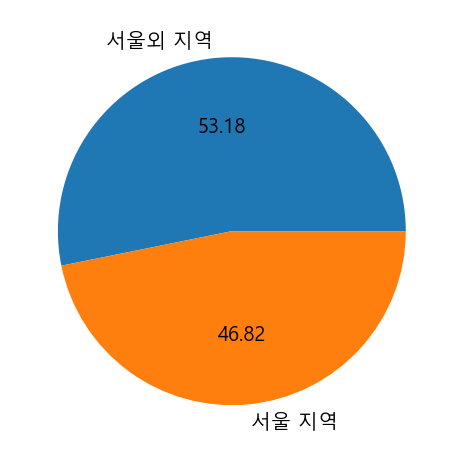

In [44]:
# 서울 증가량의 비율
import matplotlib.pyplot as plt
# ratio 지정하기 
times = [2.450431,2.157317]
# label 지정하기(ratio에 맞게 순서대로 입력한다)
timeslabels = ['서울외 지역', '서울 지역']
plt.pie(times, labels=timeslabels, autopct="%.2f")
# autopct는 파이차트 안에 표시될 숫자의 형식을 지정하며 소수점 이하 두자리까지 표시하도록 설정
plt.show()

### ⭐️ 해석
    서울의 토지, 건물의 개수는 2366 , 서울아닌지역의 토지, 건물 개수는 13239로 대략 5배이다. 이들의 증가액의 총 합을 확인하였을때 서울과 서울 아닌지역의 증가액 비율이 46.82, 53.18로 차이가 크게 안나는 것을 확인할 수 있다. 이를 보아 서울의 건물, 토지의 증가액이 서울지역에서 상당히 높다고 생각할 수 있다.

----

# 결론

* 실제 데이터분석을 진행하기전에 고위공직자들의 재산이 코로나 사태 중에도 증가한 것으로 모아 평균적으로 부유한 것으로 생각했습니다. 하지만 데이터셋을 분석해보니, 코로나로 혹은 다른 사유로 인한 부동산의 하락으로 채무를 가진 공직자도 적지 않았습니다.

* 알고있던것보다 생소한 직위도 굉장히 많았으며, 그들 중 상위가 재산이 놀라울 정도로 많기 때문에 공직자의 재산 평균이 상승한 것이지, 공직자의 실제 평균 재산이 많은 것은 아니었습니다. 또한, 경제보좌관 이외에는 공직자의 직책 특성으로 인해 재산상의 이점을 얻는 경우는 명확히 보이지 않았습니다. 

* 아시다시피, 코로나 사태 이후로 증권과 부동산의 경제적 가치가 급증했습니다. 맨 처음 참고했던 기사와 같이 고위 공직자의 재산이 늘어난 것은 그 중 증권의 영향이 가장 컸으며, 건물 또한 기존에 소유했던 재산을 통해 시세차익을 본 경우가 많았습니다. 

* 물론 서울의 부동산 가격이 폭등했다는 것은 알고있었으나, 서울 외의 지역과 비교했을 때 가격상의 비율이 우리나 전체 증가액의 50퍼센트에 근접하다는 것을 분석을 통하여 보고나서야 체감이 되었습니다.